In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Input Dataset

In [2]:
df = pd.read_csv('employee_churn_prediction_updated.csv')

In [3]:
df.sample(10)

employee_id  age  gender    education  experience_years  monthly_target  \
297          298   28  Female  High School                 6             101   
408          409   36    Male      Diploma                 0             171   
4              5   29  Female  High School                 7             142   
568          569   42    Male  High School                 7             144   
667          668   37  Female     Bachelor                 2             150   
412          413   41    Male      Diploma                 4             169   
404          405   25    Male      Diploma                 8              81   
828          829   42    Male  High School                 5              63   
526          527   24    Male     Bachelor                 2             119   
567          568   25    Male      Diploma                 5             155   

     target_achievement  working_hours_per_week  overtime_hours_per_week  \
297                1.12                      60                        5   
408                1.18                      69                        1   
4                  1.01                      45                        9   
568                0.44                      60                       15   
667                0.77                      48                        2   
412                1.16                      61                        0   
404                1.07                      68                        5   
828                0.81                      48                       10   
526                0.84                      54                        1   
567                0.74                      57                       11   

      salary  commission_rate  job_satisfaction work_location  \
297  7847384             0.02                 2         Urban   
408  6352921             0.04                 3         Urban   
4    5154327             0.08                 3         Rural   
568  7502748             0.09                 3         Urban   
667  7435728             0.09                 1         Urban   
412  7637452             0.04                 4         Urban   
404  6954780             0.06                 4         Urban   
828  5538361             0.10                 1         Rural   
526  4723480             0.08                 3      Suburban   
567  5379093             0.06                 4         Urban   

     manager_support_score  company_tenure_years  churn marital_status  \
297                      4                   1.9      1         Single   
408                      3                   3.1      0         Single   
4                        2                   4.5      0         Single   
568                      2                   3.1      1        Married   
667                      4                   2.8      0         Single   
412                      2                   1.9      1         Single   
404                      1                   0.3      1         Single   
828                      1                   2.1      1        Married   
526                      4                   3.3      0         Single   
567                      4                   0.2      0        Married   

     distance_to_office_km churn_period  
297                      4     3 Months  
408                     17       Stayed  
4                       14       Stayed  
568                     12   Onboarding  
667                     33       Stayed  
412                     41     3 Months  
404                     41   Onboarding  
828                     29   Onboarding  
526                     29       Stayed  
567                     14       Stayed

# Handling Type Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

Type data is already correct !!

# Missing Values

In [5]:
df.isnull().sum()

employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64

No missing values in the dataset

# Duplicated Data

In [7]:
df.duplicated().sum()

0

There's no duplicated data in dataset

# Outliers

In [8]:
df.describe()

employee_id          age  experience_years  monthly_target  \
count  1000.000000  1000.000000       1000.000000     1000.000000   
mean    500.500000    32.845000          4.495000      125.877000   
std     288.819436     6.854046          2.890732       43.895748   
min       1.000000    22.000000          0.000000       50.000000   
25%     250.750000    27.000000          2.000000       86.750000   
50%     500.500000    33.000000          5.000000      127.500000   
75%     750.250000    39.000000          7.000000      164.000000   
max    1000.000000    44.000000          9.000000      199.000000   

       target_achievement  working_hours_per_week  overtime_hours_per_week  \
count          1000.00000             1000.000000              1000.000000   
mean              0.79188               54.102000                 9.508000   
std               0.22872                8.721907                 5.739066   
min               0.40000               40.000000                 0.000000   
25%               0.59000               46.000000                 5.000000   
50%               0.79000               54.000000                 9.500000   
75%               0.99000               62.000000                15.000000   
max               1.20000               69.000000                19.000000   

             salary  commission_rate  job_satisfaction  manager_support_score  \
count  1.000000e+03      1000.000000       1000.000000             1000.00000   
mean   5.487914e+06         0.058830          2.524000                2.53200   
std    1.436482e+06         0.023278          1.125474                1.11724   
min    3.000037e+06         0.020000          1.000000                1.00000   
25%    4.258970e+06         0.040000          2.000000                2.00000   
50%    5.471270e+06         0.060000          3.000000                3.00000   
75%    6.727894e+06         0.080000          4.000000                4.00000   
max    7.999712e+06         0.100000          4.000000                4.00000   

       company_tenure_years        churn  distance_to_office_km  
count            1000.00000  1000.000000            1000.000000  
mean                2.59800     0.629000              24.119000  
std                 1.40282     0.483314              13.978062  
min                 0.10000     0.000000               1.000000  
25%                 1.40000     0.000000              12.000000  
50%                 2.60000     1.000000              23.500000  
75%                 3.80000     1.000000              36.000000  
max                 5.00000     1.000000              49.000000

In [9]:
# IDENTIFIKASI KOLOM NUMERIK
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Drop kolom yang tidak relevan untuk analisis outlier
for col in ['employee_id', 'churn','']:
    if col in num_cols:
        num_cols.remove(col)

print("Kolom numerik yang akan dianalisis untuk outlier:")
print(num_cols)

Kolom numerik yang akan dianalisis untuk outlier:
['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'distance_to_office_km']


In [10]:
# Buat DataFrame untuk menyimpan jumlah outlier per kolom
outlier_summary = pd.DataFrame(columns=["column", "outlier_count", "total_data", "percent_outlier"])

for col in num_cols:
    if df[col].dtype in [np.float64, np.int64]:  # hanya numerik
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = (z_scores > 3)
        count_out = outliers.sum()
        total = df[col].notna().sum()
        percent = round((count_out / total) * 100, 2)
        outlier_summary = pd.concat([outlier_summary, pd.DataFrame({
            "column": [col],
            "outlier_count": [count_out],
            "total_data": [total],
            "percent_outlier": [percent]
        })], ignore_index=True)

# Tampilkan ringkasan jumlah outlier per kolom
display(outlier_summary.sort_values(by="percent_outlier", ascending=False))

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\2938805227.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([outlier_summary, pd.DataFrame({


column outlier_count total_data  percent_outlier
0                       age             0       1000              0.0
1          experience_years             0       1000              0.0
2            monthly_target             0       1000              0.0
3        target_achievement             0       1000              0.0
4    working_hours_per_week             0       1000              0.0
5   overtime_hours_per_week             0       1000              0.0
6                    salary             0       1000              0.0
7           commission_rate             0       1000              0.0
8          job_satisfaction             0       1000              0.0
9     manager_support_score             0       1000              0.0
10     company_tenure_years             0       1000              0.0
11    distance_to_office_km             0       1000              0.0

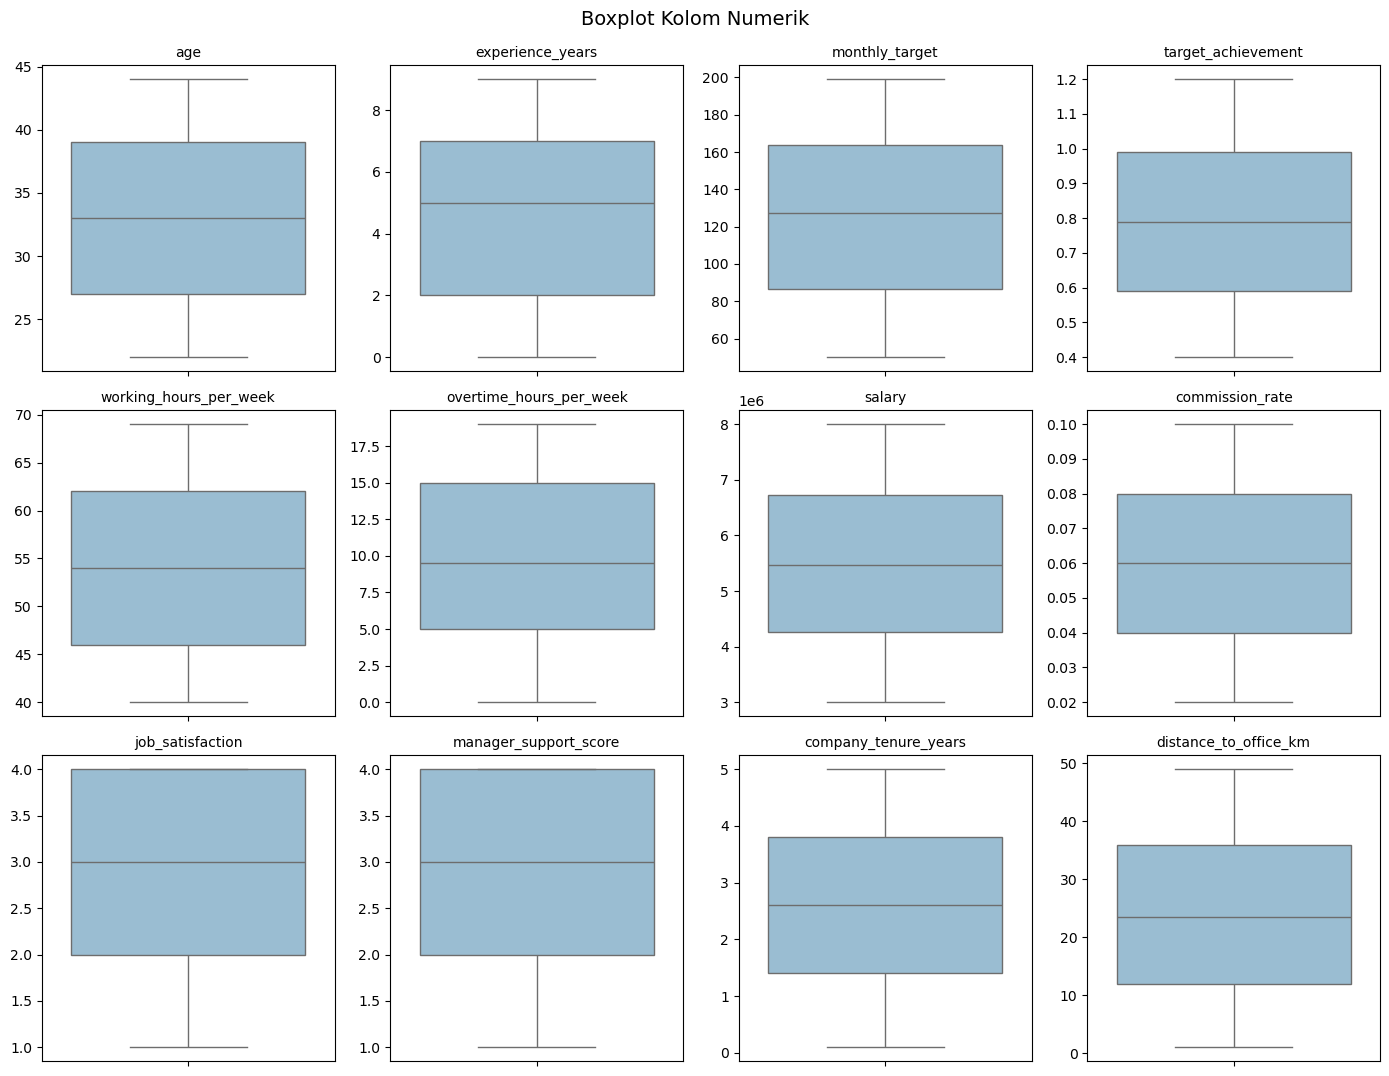

In [11]:
# Visualisasi boxplot untuk kolom numerik
top_cols = outlier_summary.sort_values(by="percent_outlier", ascending=False)["column"]

# Tentukan jumlah subplot per baris (misal 3x3 grid)
n_cols = 4
n_rows = int(np.ceil(len(top_cols) / n_cols))

# Buat figure grid untuk boxplot
plt.figure(figsize=(3.5 * n_cols, 3.5 * n_rows))

for i, col in enumerate(top_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='#91bfdb', orient='v')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Boxplot Kolom Numerik", fontsize=14, y=1.02)
plt.show()

The dataset its actually good and there's no extreme outliers in dataset

# Inconsistent data

In [13]:
print(df['work_location'].value_counts())
print(df['education'].value_counts())
print(df['gender'].value_counts())
print(df['marital_status'].value_counts())

work_location
Urban       500
Suburban    305
Rural       195
Name: count, dtype: int64
education
Diploma        404
High School    299
Bachelor       297
Name: count, dtype: int64
gender
Male      703
Female    297
Name: count, dtype: int64
marital_status
Single     606
Married    394
Name: count, dtype: int64


From the data extracts, the categories seem consistence

# Anomaly Detection

## Work Experience vs Age is Illogical

There is data where an employee's age is not proportional to their work experience. For example, someone is 25 years old but has 10 years of work experience, which means they started working full-time at the age of 15. Although possible, this is highly unusual in the context of professional data.

In [15]:
# membuat kolom sementara
df['approx_start_age'] = df['age'] - df['experience_years']
unreasonable_start_age_data = df[df['approx_start_age'] < 18]

if unreasonable_start_age_data.empty:
    print("Tidak ada data anomali yang ditemukan dengan kriteria usia mulai bekerja < 18 tahun.")
else:
    # Menampilkan hanya kolom yang relevan agar mudah dibaca
    print("Ditemukan baris-baris berikut yang dianggap anomali:")
    print(unreasonable_start_age_data[['employee_id', 'age', 'experience_years', 'approx_start_age']])

Ditemukan baris-baris berikut yang dianggap anomali:
     employee_id  age  experience_years  approx_start_age
17            18   23                 8                15
20            21   23                 7                16
35            36   24                 7                17
70            71   23                 7                16
90            91   22                 9                13
..           ...  ...               ...               ...
959          960   22                 7                15
968          969   22                 8                14
981          982   22                 6                16
982          983   26                 9                17
999         1000   23                 6                17

[74 rows x 4 columns]


In [16]:
# PENANGANAN: Hapus baris anomali
initial_rows = len(df)
df = df[df['approx_start_age'] >= 18]
cleaned_rows = len(df)
print(f"\n[PENANGANAN] Anomali 2 telah ditangani: {initial_rows - cleaned_rows} baris dengan usia/pengalaman tidak logis telah dihapus.")


[PENANGANAN] Anomali 2 telah ditangani: 74 baris dengan usia/pengalaman tidak logis telah dihapus.


In [17]:
# Menghapus kolom bantu
df = df.drop(columns=['approx_start_age'])

In [18]:
print(f"Jumlah baris data akhir setelah pembersihan: {len(df)}")

Jumlah baris data akhir setelah pembersihan: 926


For the illogical Age vs. Experience data anomaly, it is better to delete it, because we cannot guess the correct value and the amount is likely to be small.

# Exploratory Data Analysis (EDA)

In [19]:
#DATASET OVERVIEW
# =====================================================
print("=== DATASET OVERVIEW ===")
print(f"Jumlah baris dan kolom: {df.shape}")

=== DATASET OVERVIEW ===
Jumlah baris dan kolom: (926, 19)



Target column terdeteksi: 'churn'
churn
1    585
0    341
Name: count, dtype: int64


C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\1915858118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


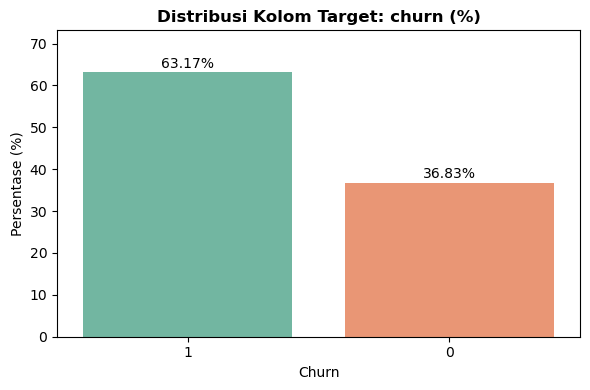

In [20]:
# IDENTIFIKASI TARGET DAN CEK DISTRIBUSINYA
target_col = 'churn'

if target_col in df.columns:
    print(f"\nTarget column terdeteksi: '{target_col}'")

    # Hitung distribusi dalam jumlah
    target_counts = df[target_col].value_counts()
    print(target_counts)

    # Hitung distribusi dalam persen
    target_pct = df[target_col].value_counts(normalize=True) * 100

    # Visualisasi distribusi target dalam persen
    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=target_pct.index.astype(str),
        y=target_pct.values,
        palette="Set2"   # Warna berbeda untuk tiap bar
    )

    plt.title(f"Distribusi Kolom Target: {target_col} (%)", fontsize=12, weight='bold')
    plt.xlabel(target_col.capitalize())
    plt.ylabel("Persentase (%)")
    plt.ylim(0, target_pct.max() + 10)  # Tambahkan ruang untuk label di atas bar
    plt.xticks(rotation=0)

    # Tambahkan label persen di atas tiap bar
    for i, val in enumerate(target_pct.values):
        plt.text(i, val + 1, f"{val:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("❌ Kolom target tidak ditemukan, silakan tentukan secara manual.")

In [21]:
# Pisahkan fitur numerik dan kategorikal, dengan pengecualian kolom tertentu
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Keluarkan kolom yang tidak relevan dari masing-masing list
if 'employee_id' in numeric_features:
    numeric_features.remove('employee_id')

if 'churn_period' in categorical_features:
    categorical_features.remove('churn_period')

# Tampilkan hasil akhir untuk verifikasi
print("Fitur numerik:", numeric_features)
print("Fitur kategorikal:", categorical_features)

Fitur numerik: ['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'churn', 'distance_to_office_km']
Fitur kategorikal: ['gender', 'education', 'work_location', 'marital_status']


In [22]:
# Pisahkan fitur selain target, dan drop kolom employee_id serta churn_period
X = df.drop(columns=[target_col, 'employee_id', 'churn_period'], errors='ignore')
y = df[target_col]

# Konversi kategorikal ke numerik sementara untuk perhitungan Mutual Information
X_encoded = X.copy()
for col in categorical_features:
    if col in X_encoded.columns:  # pastikan kolom masih ada di fitur
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Data Visualization & Analysis

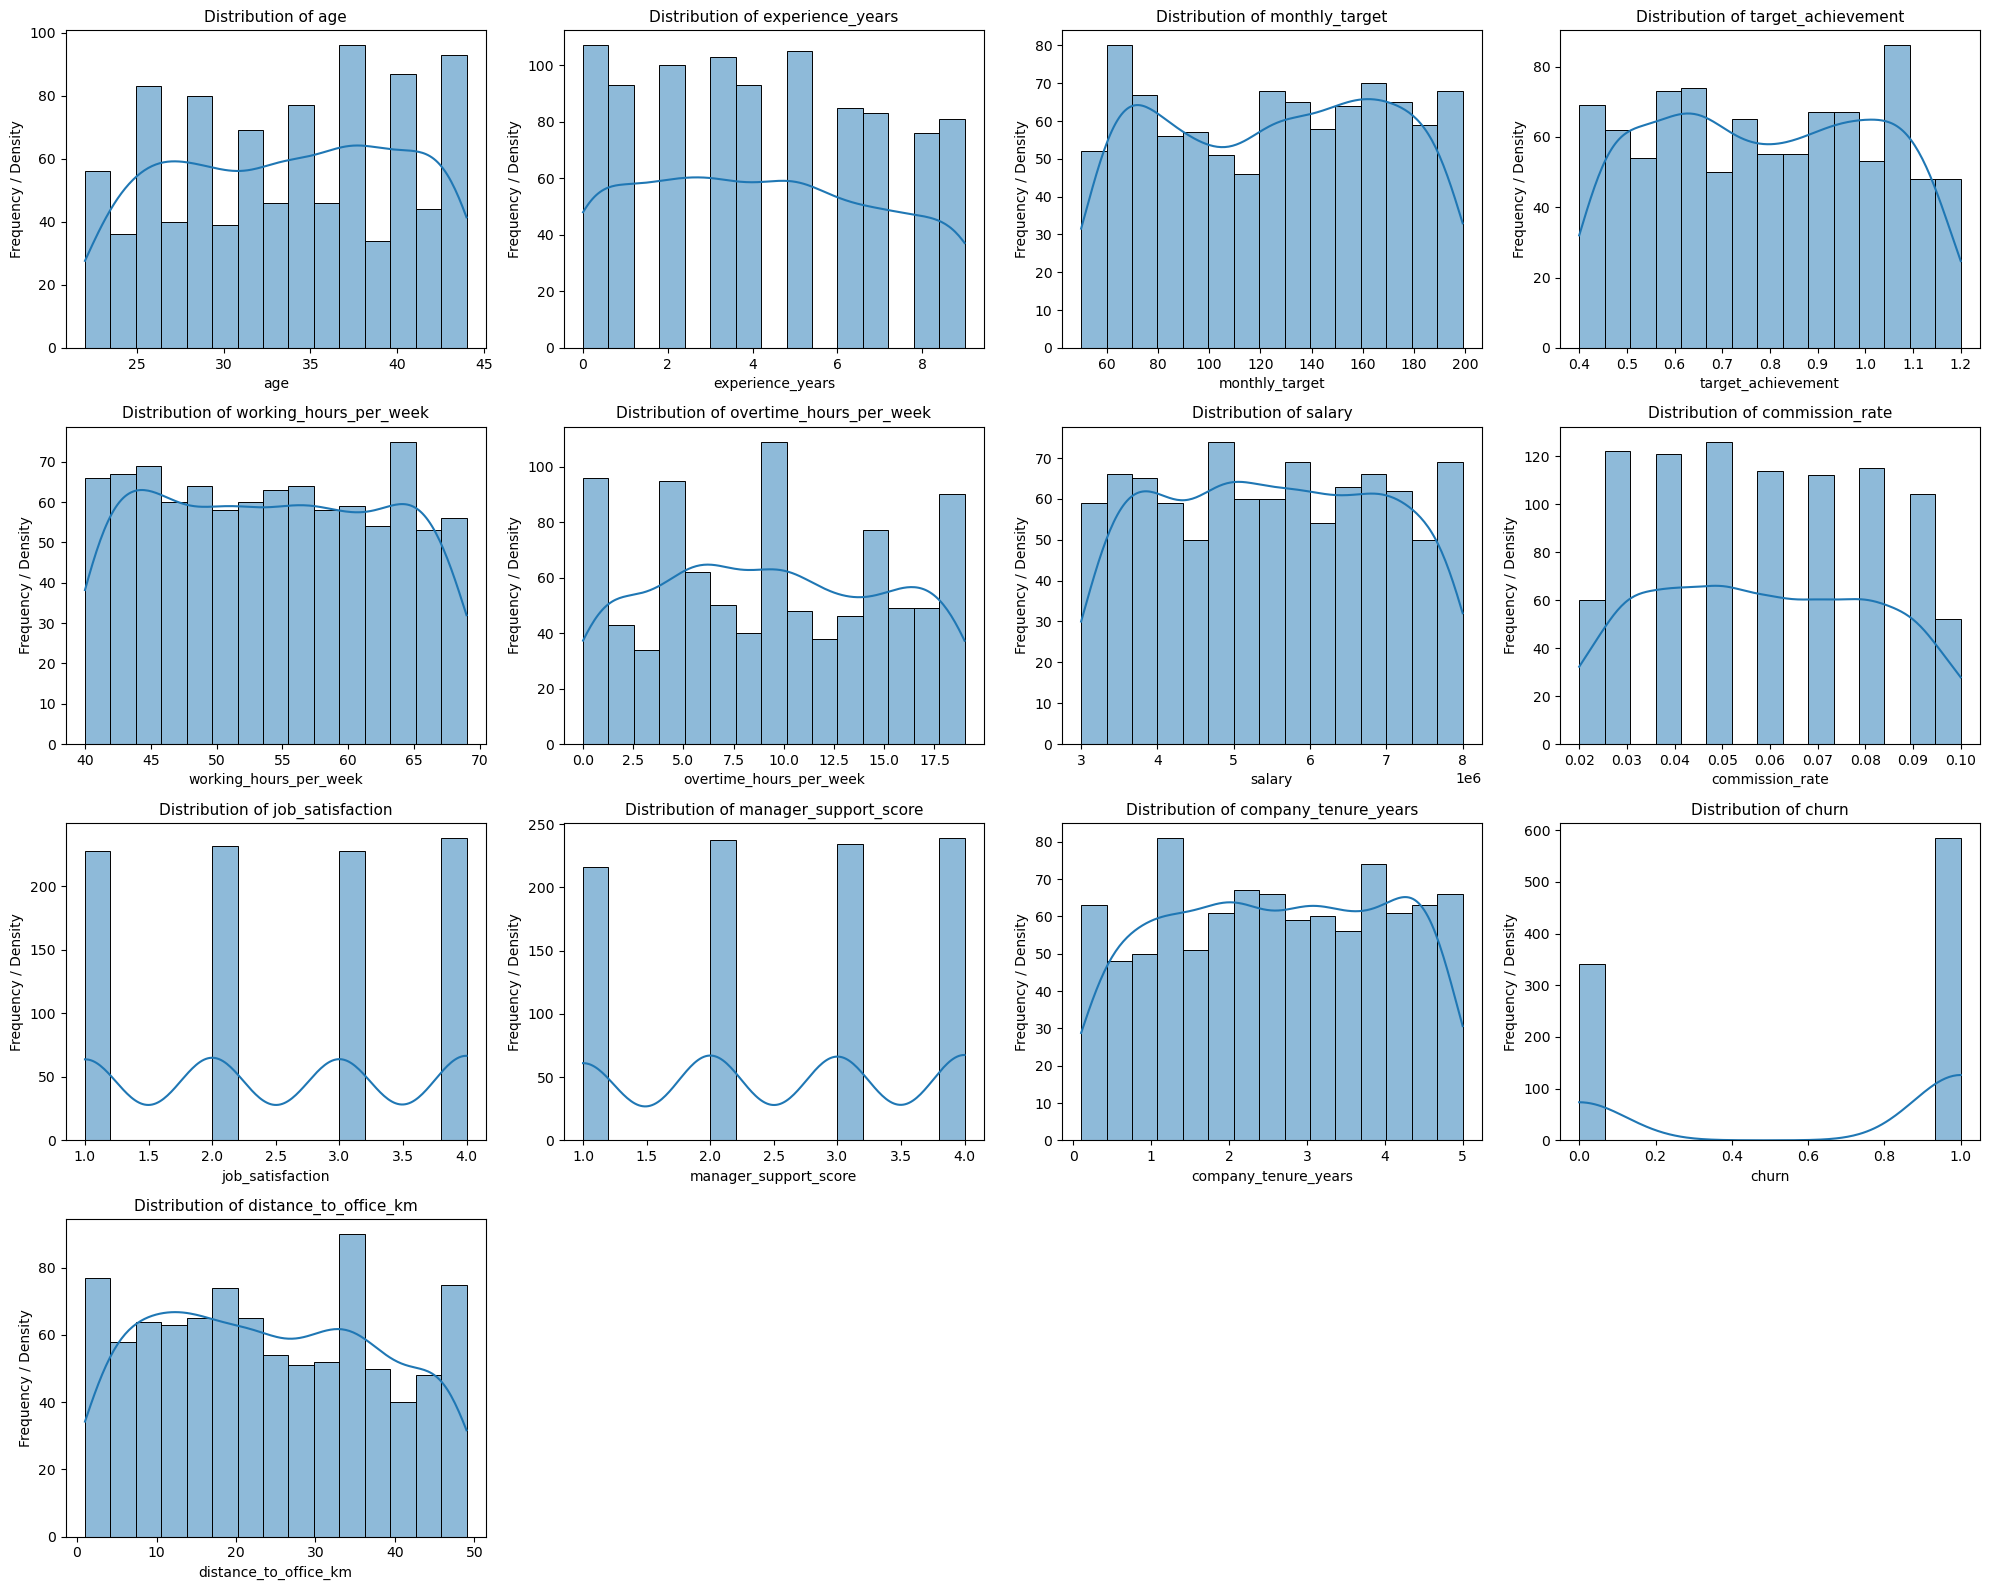

In [23]:
# Visualisasi Univariate Analysis
n_cols = 4
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

# --- Plot Hist & KDE ---
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, bins=15, kde=True, ax=ax, edgecolor='black', linewidth=0.7)
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')

plt.tight_layout()
plt.show()

The visualization above shows that the data distribution exhibits a multimodal pattern (many peaks). This indicates that the data has characteristics or is diverse. This pattern also indicates that the data likely consists of several distinct population subgroups with non-uniform behavior.

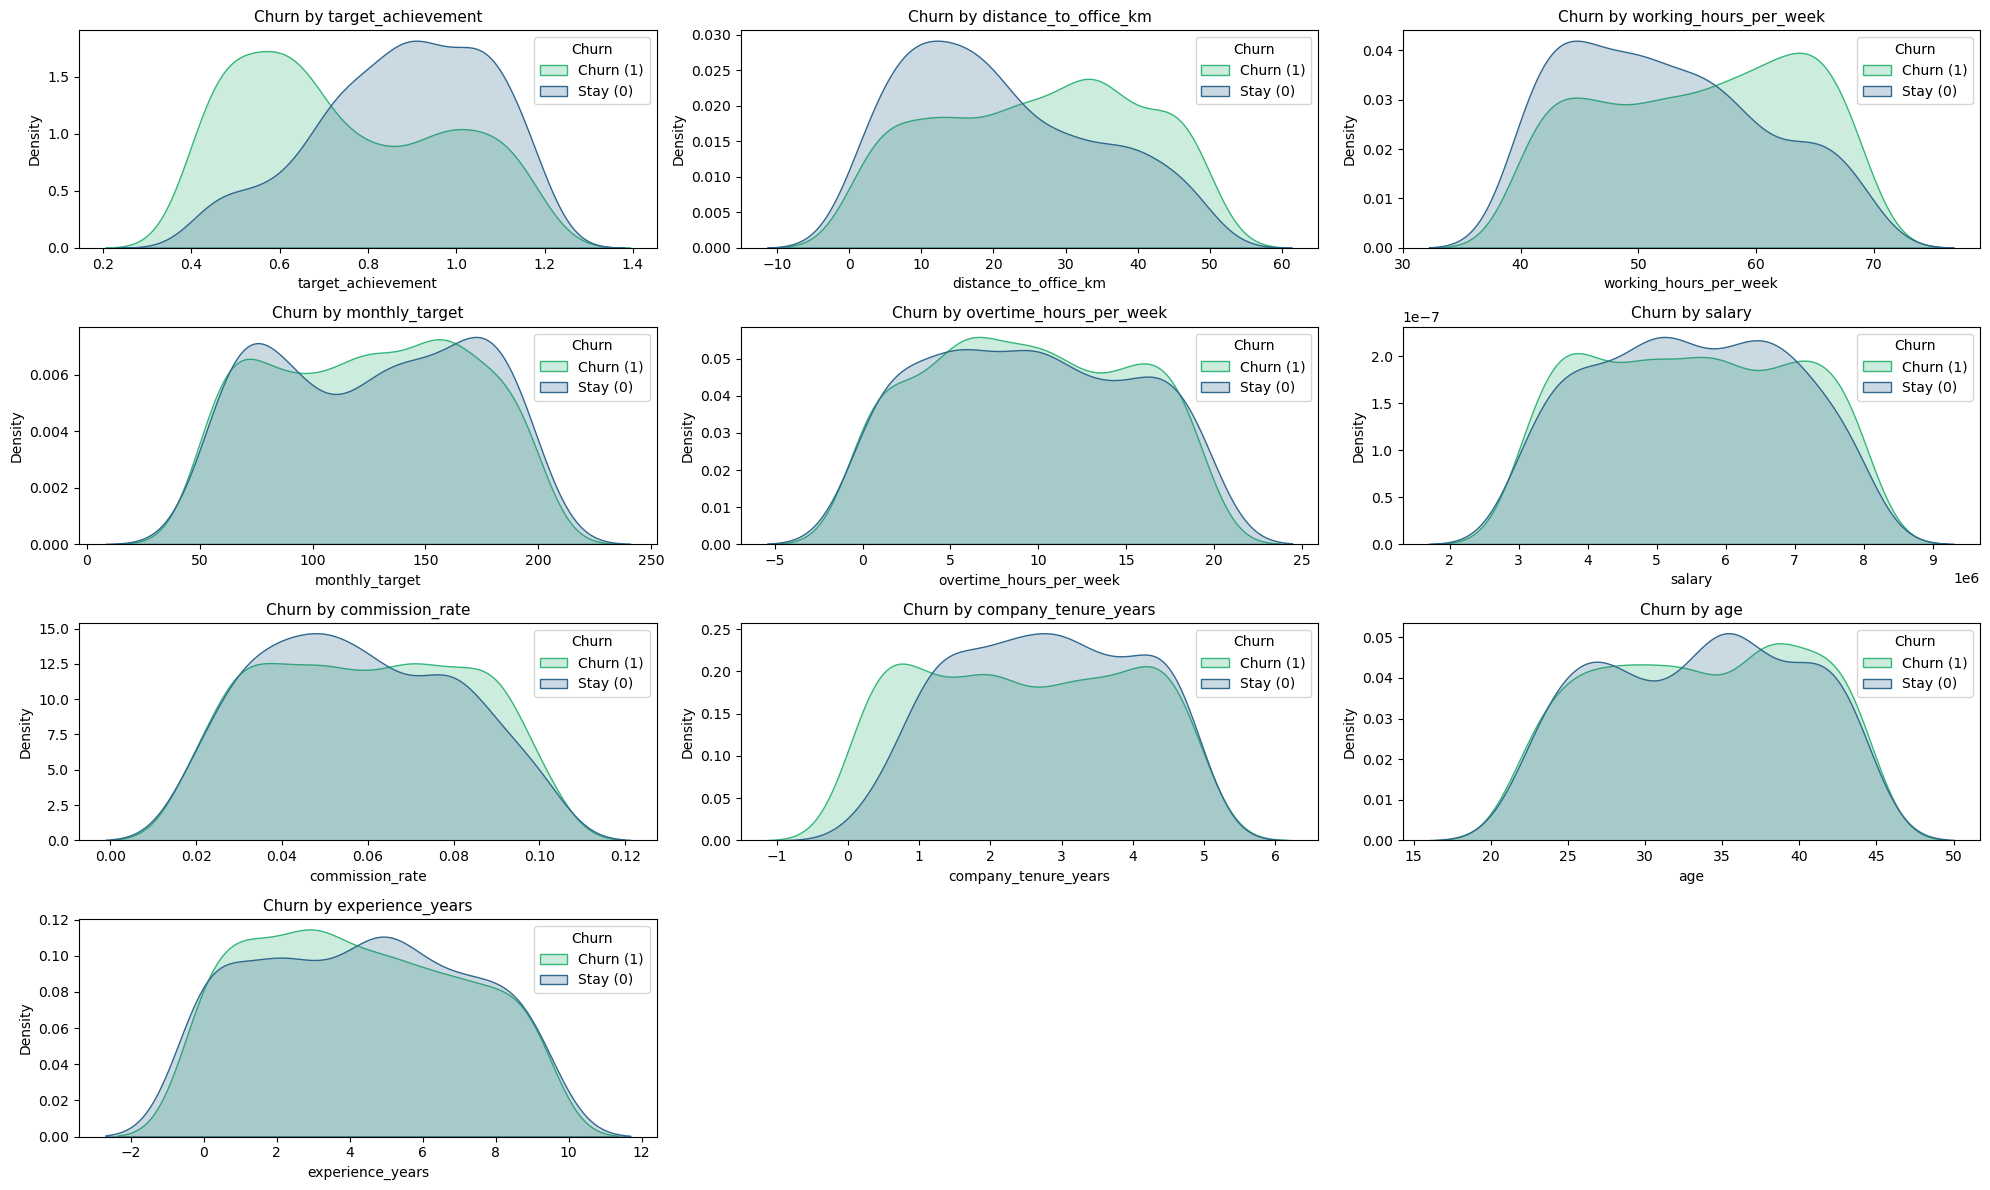

In [24]:
# Visualisasi Multivariate Analysis

# --- Pastikan kolom salary & commission_rate numerik ---
df['salary'] = df['salary'].replace('[^0-9.]', '', regex=True).astype(float)
df['commission_rate'] = df['commission_rate'].replace('%', '', regex=True).astype(float)

# --- Daftar kolom yang ingin diplot ---
features_to_plot_kde = [
    'target_achievement', 'distance_to_office_km', 'working_hours_per_week',
    'monthly_target', 'overtime_hours_per_week', 'salary', 'commission_rate',
    'company_tenure_years', 'age', 'experience_years'
]

# --- Pastikan semua kolom numerik ---
numeric_cols = [col for col in features_to_plot_kde if pd.api.types.is_numeric_dtype(df[col])]

# --- Plot KDE ---
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Churn by {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Churn (1)', 'Stay (0)'])

plt.tight_layout()
plt.show()

In general, the factors that clearly drive employee churn are target achievement, distance to the office, and weekly working hours.

Other factors that appear to have an influence include commission rate, work experience and length of service with the company.

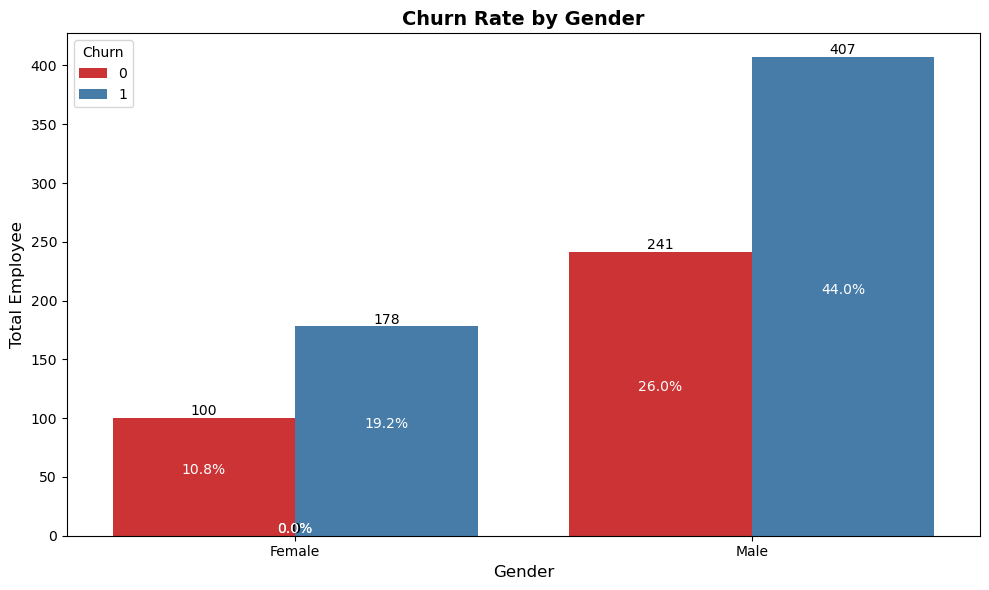

In [25]:
# Multivariate Gender

gender_churn = df.groupby('gender')['churn'].value_counts(normalize=False).rename('employee').reset_index()
total = len(df)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='employee', hue='churn', data=gender_churn, palette='Set1')

plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  gender_churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{gender_churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Male employees are the most likely to churn or leaves. However, the churn rate between male and female employees is very small or almost insignificant.

This means that gender is not the primary factor determining whether an employee leaves or not.

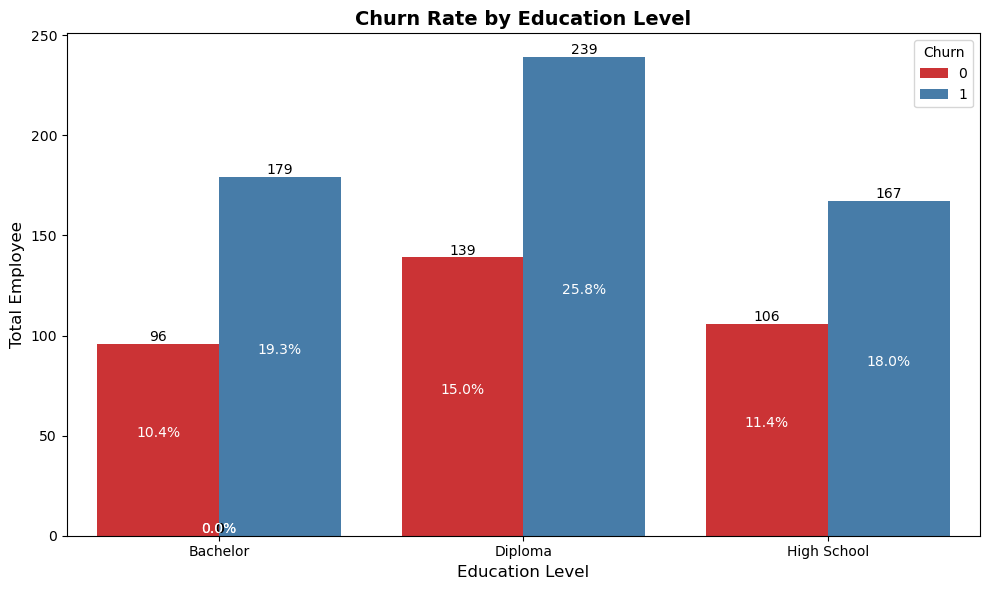

In [26]:
# Multivariate Education

education_churn = df.groupby('education')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y='employee', hue='churn', data=education_churn, palette='Set1')

plt.title('Churn Rate by Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)

for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Highest Risk: Employees with a Bachelor's degree (S1) have the highest likelihood of leaving (65.1%)

Highest Volume: Despite their relatively moderate churn rate, employees with a Diploma contributed the largest churn volume (239 people) because they are the largest employee group.

Lowest Risk: Employees with a High School education have the lowest risk of churn.

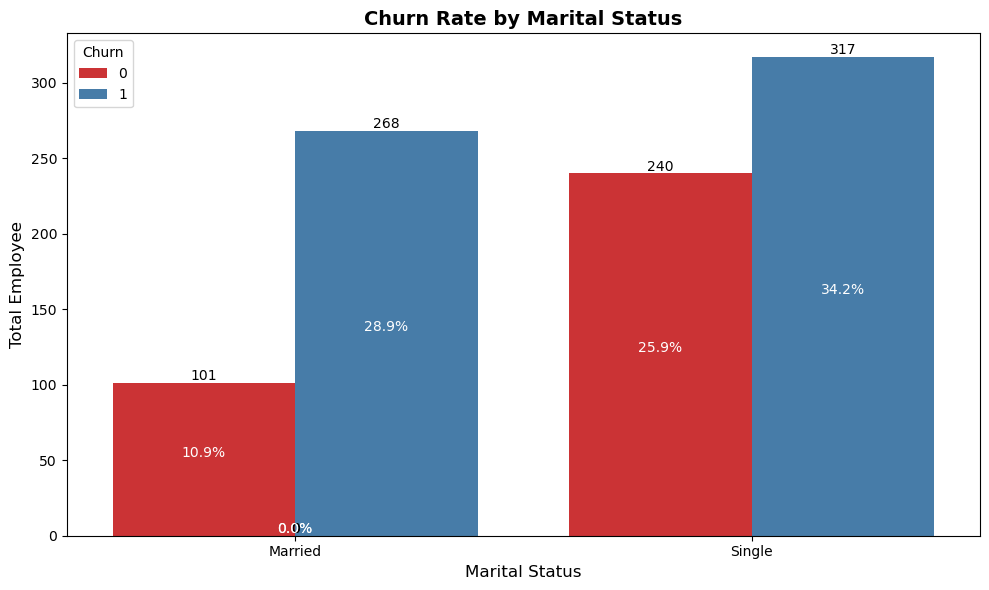

In [27]:
# Multivariate Marital

marital_churn = df.groupby('marital_status')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='marital_status', y='employee', hue='churn', data=marital_churn, palette='Set1')

plt.title('Churn Rate by Marital Status', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Married employees had a significantly higher chance of leaving at 72.6% compared to single employees at 56.9%.

Married status is a strong indicator of churn risk in this company. Further research is needed to investigate the reasons behind the high churn rate in this group.

Factors such as lack of work flexibility or work-life balance pressures may be contributing factors.

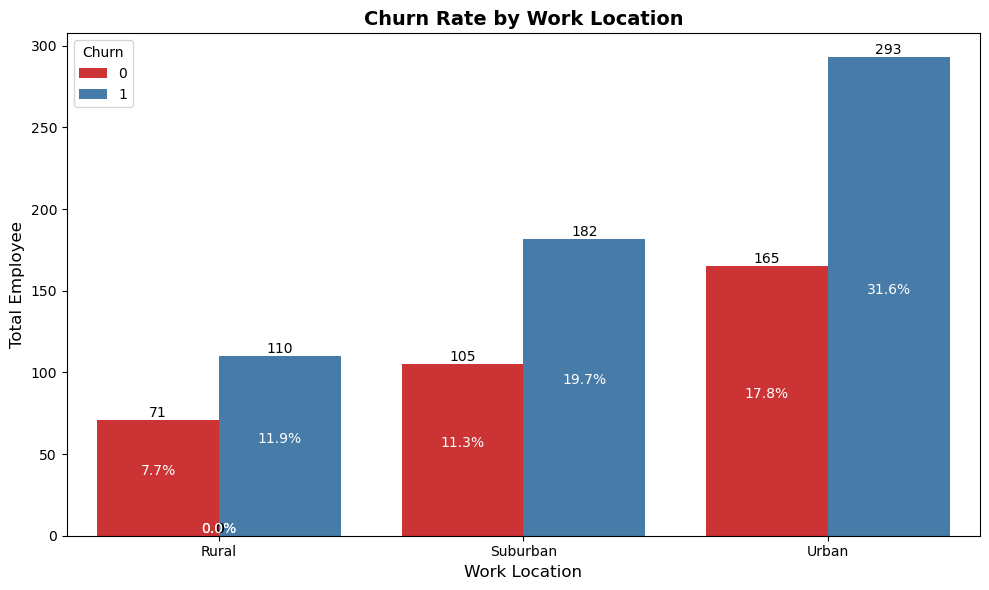

In [28]:
# Multivariate Location

location_churn = df.groupby('work_location')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='work_location', y='employee', hue='churn', data=location_churn, palette='Set1')

plt.title('Churn Rate by Work Location', fontsize=14, fontweight='bold')
plt.xlabel('Work Location', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Employees in urban locations had the highest churn volume and a relatively higher churn rate 63.9%.

Meanwhile, employees in suburban locations had a churn rate at 63.4% and Employees in rural locations had the lowest churn rate 60.8%.

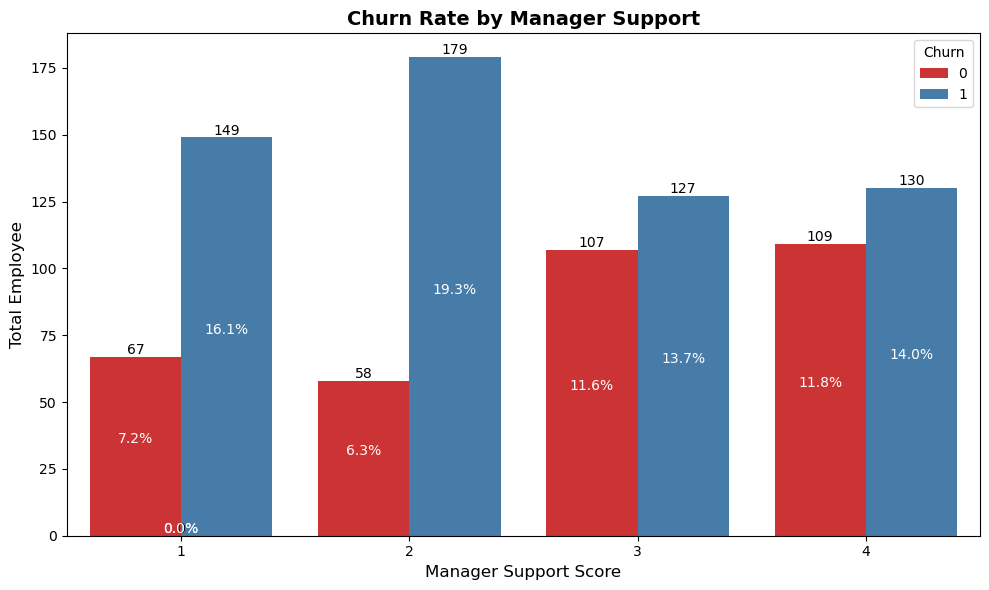

In [29]:
# Multivariate Manager Support

manager_support_churn = df.groupby('manager_support_score')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='manager_support_score', y='employee', hue='churn', data=manager_support_churn, palette='Set1')

plt.title('Churn Rate by Manager Support', fontsize=14, fontweight='bold')
plt.xlabel('Manager Support Score', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Manager support is a very strong predictor of churn:

There is a significant difference in churn risk between the low support (Scores 1 & 2) and high support (Scores 3 & 4) groups, with a difference of approximately 21 percentage points between the highest (75.5%) and lowest (54.3%).

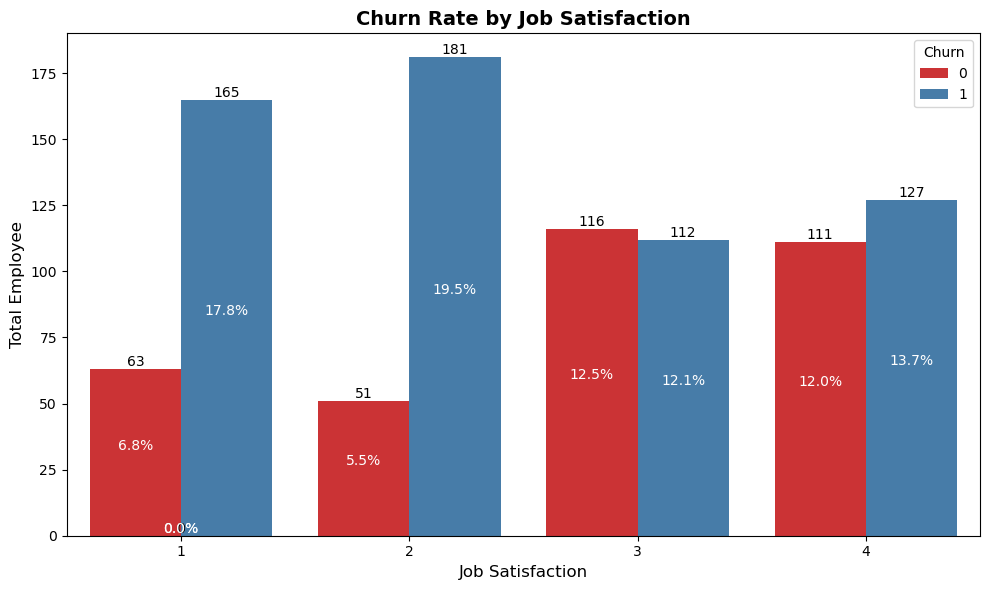

In [30]:
# Multivariate Job Satisfication

satisfaction_churn = df.groupby('job_satisfaction')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_satisfaction', y='employee', hue='churn', data=satisfaction_churn, palette='Set1')

plt.title('Churn Rate by Job Satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

Job satisfaction is also a very strong determinant of churn:

There is a significant difference in churn risk, reaching 28.9 percentage points between the highest risk (Scores 1&2: 78.0%) and the lowest (Scores 3&4: 49.1%).

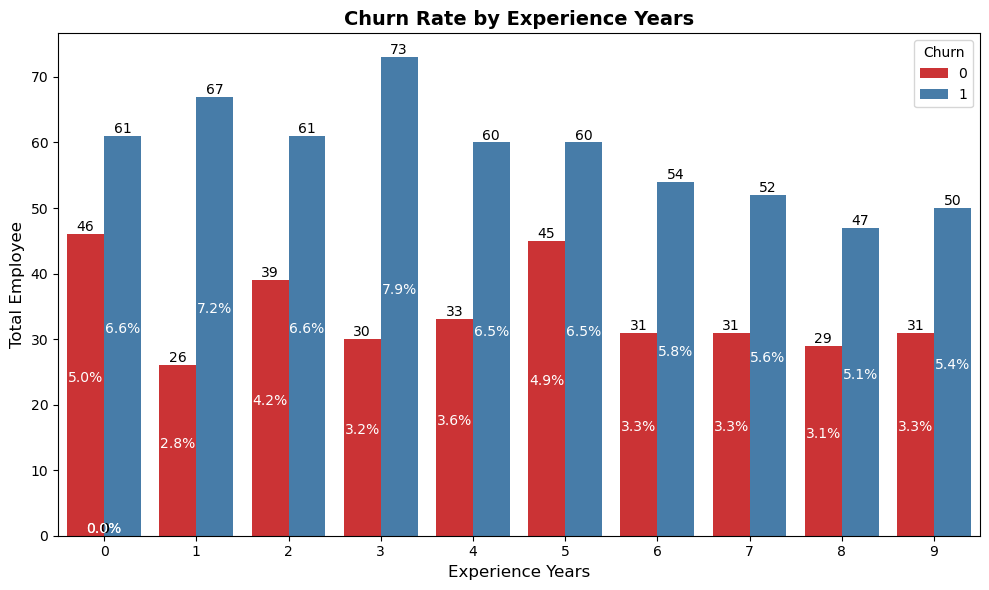

In [31]:
# Multivariate Experience Years

years_churn = df.groupby('experience_years')['churn'].value_counts(normalize=False).rename('employee').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='experience_years', y='employee', hue='churn', data=years_churn, palette='Set1')

plt.title('Churn Rate by Experience Years', fontsize=14, fontweight='bold')
plt.xlabel('Experience Years', fontsize=12)
plt.ylabel('Total Employee', fontsize=12)
plt.legend(title='Churn')

# Add text labels for percentages
for p in ax.patches:
  churn_rate = (p.get_height() / total)*100
  ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  ax.annotate(f'{churn_rate:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()/2.),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points',color='white')

plt.tight_layout()
plt.show()

The overall churn risk is very high early in a career. Employees with 0 to 4 years of experience all have relative churn rates above 57%, with peaks in the first (72.0%) and third years (70.9%).

# Feature Engineering

In [33]:
# OVERTIME RATIO
# Measures how much of total weekly working time is spent in overtime.
df['overtime_ratio'] = df['overtime_hours_per_week'] / df['working_hours_per_week']

# BURNOUT SCORE
# Combines overtime intensity and low job satisfaction into a single stress metric.
df['burnout_score'] = df['overtime_ratio'] * (1 - df['job_satisfaction'] / 5)

# ACHIEVEMENT STRESS
# Captures the frustration of working overtime but still missing targets.
df['achievement_stress'] = (1 - df['target_achievement']) * df['overtime_ratio']
df['achievement_stress'] = df['achievement_stress'].clip(lower=0)  # No negative stress

# ACHIEVE STATUS (binary)
# Indicates whether the employee met or exceeded their performance target.
df['achieve_status'] = (df['target_achievement'] >= 1).astype(int)

# LOYALTY INDEX
# Represents the proportion of an employee's total career spent at the company.
df['loyalty_index'] = df['company_tenure_years'] / (df['experience_years'] + 1)

# DISTANCE STRESS (adjusted by marital status)
# Reflects commuting stress, adjusted for family obligations and manager support.
df['distance_stress'] = df['distance_to_office_km'] / (df['manager_support_score'] + 1)

def adjust_distance_stress(row):
    if row['marital_status'] == 'Married':
        return row['distance_stress'] * 1.2
    else:
        return row['distance_stress'] * 1

df['distance_stress_adjusted'] = df.apply(adjust_distance_stress, axis=1)

# PROMOTION POTENTIAL
# Balances job satisfaction, performance, and tenure using a log scale to reduce saturation.
df['promotion_potential'] = (df['job_satisfaction'] + 2 * df['target_achievement']) * np.log(df['company_tenure_years'] + 1)

# STRESS INDEX
# Overall stress index combining workload, performance pressure, and commute strain.
# 0.01 scaling keeps commuting influence proportional to other stress sources.
df['stress_index'] = df['burnout_score'] + df['achievement_stress'] + 0.01 * df['distance_stress_adjusted']

# CHECK RESULTS
feature_cols = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

# Show statistical summary
display(df[feature_cols].describe())

overtime_ratio  burnout_score  achievement_stress  achieve_status  \
count      926.000000     926.000000          926.000000      926.000000   
mean         0.177736       0.088896            0.041487        0.240821   
std          0.111940       0.073737            0.049678        0.427813   
min          0.000000       0.000000            0.000000        0.000000   
25%          0.086957       0.031484            0.000000        0.000000   
50%          0.170732       0.070088            0.022743        0.000000   
75%          0.262295       0.128429            0.066846        0.000000   
max          0.463415       0.361905            0.256500        1.000000   

       loyalty_index  distance_stress_adjusted  promotion_potential  \
count     926.000000                926.000000           926.000000   
mean        0.786133                  8.228567             4.870974   
std         0.880231                  5.913164             2.415961   
min         0.012500                  0.240000             0.285931   
25%         0.275000                  3.616667             3.083590   
50%         0.500000                  7.100000             4.696336   
75%         0.900000                 11.000000             6.712037   
max         4.900000                 29.400000            10.784519   

       stress_index  
count    926.000000  
mean       0.212669  
std        0.119043  
min        0.002400  
25%        0.122438  
50%        0.190986  
75%        0.279642  
max        0.751500

* overtime_ratio — Measures how much of total weekly working time is spent in overtime, indicating workload intensity.
* burnout_score — Captures stress from high overtime combined with low job satisfaction, representing burnout risk.
* achievement_stress — Reflects frustration from working overtime but still missing performance targets.
* achieve_status — A binary flag showing whether an employee met or exceeded their target (1 = yes, 0 = no).
* loyalty_index — Represents the proportion of an employee’s total career spent in the current company, showing attachment level.
* distance_stress_adjusted — Indicates commuting stress scaled by manager support and marital status sensitivity.
* promotion_potential — Estimates growth opportunity using job satisfaction, performance, and log-scaled tenure.
* stress_index — A composite indicator combining burnout, achievement stress, and commute fatigue into total stress level.

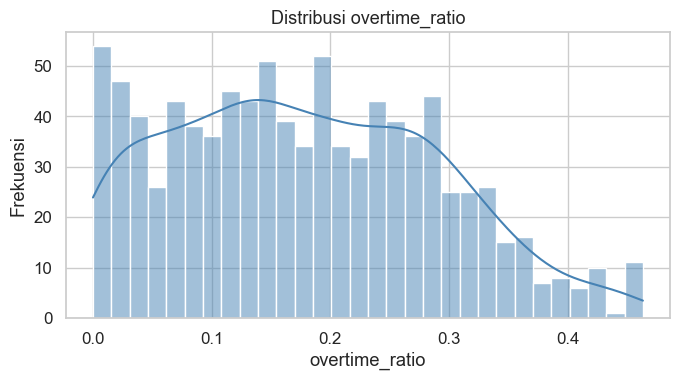

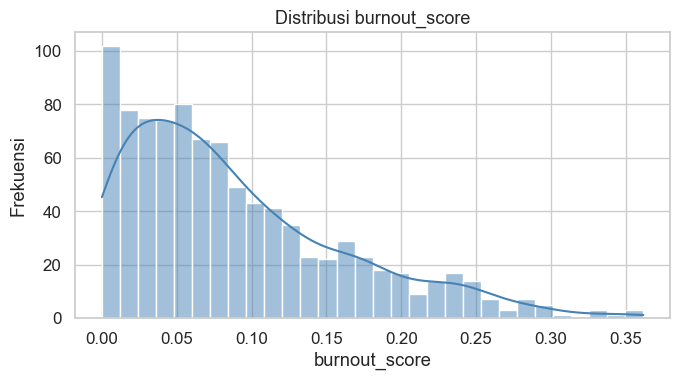

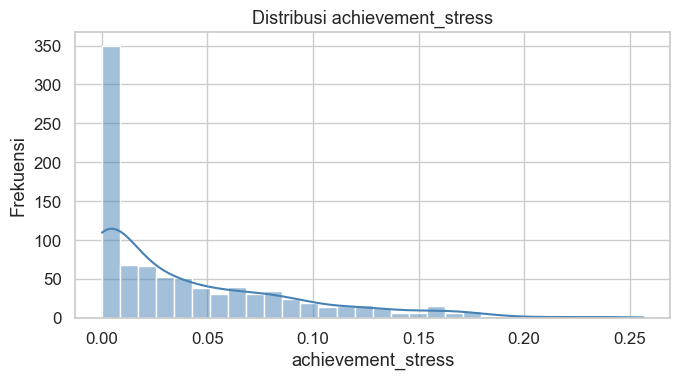

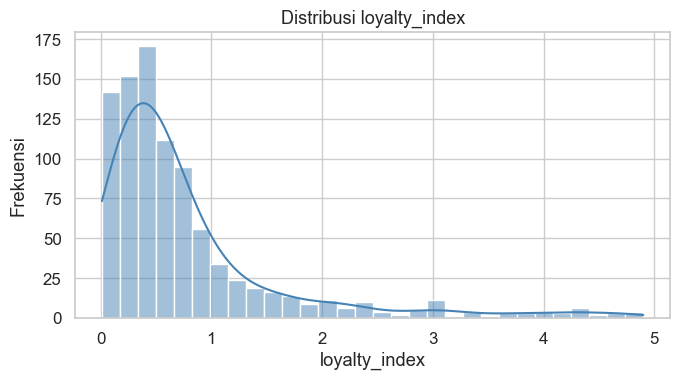

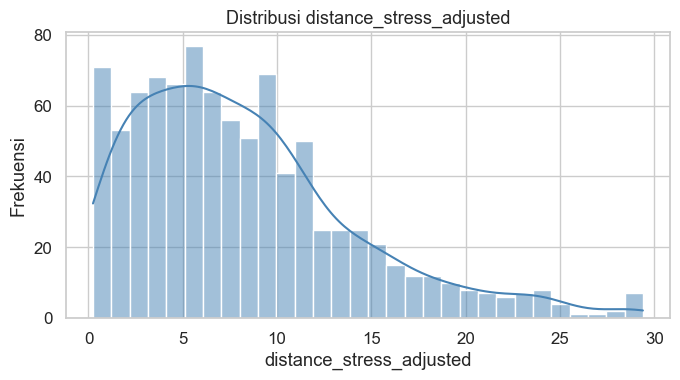

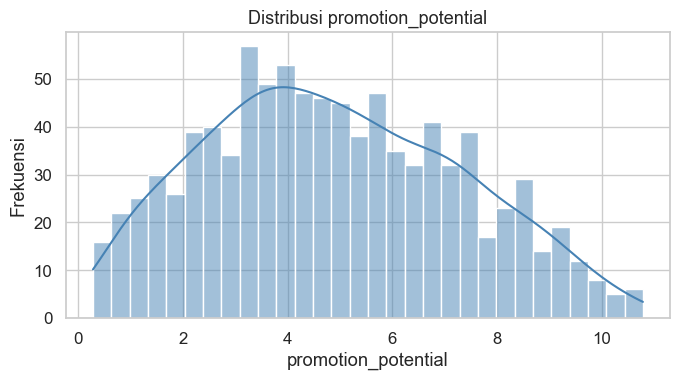

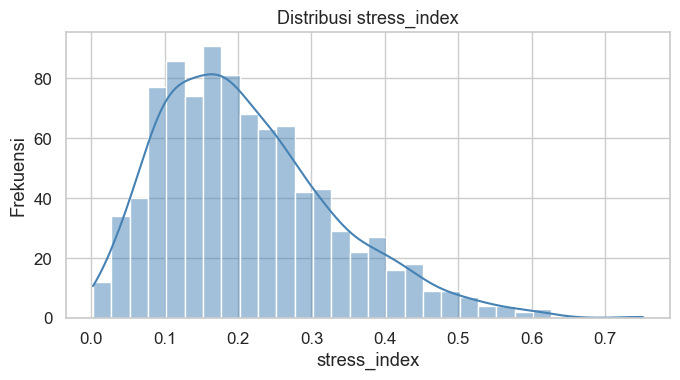

In [34]:
# Visualisasi fitur baru

sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 4)

# List fitur baru
feature_cols = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

# Plot histogram + KDE untuk fitur numerik
numeric_features = [col for col in feature_cols if df[col].dtype != 'object' and df[col].nunique() > 2]

for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribusi {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\1614579810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='achieve_status', data=df, palette='viridis')


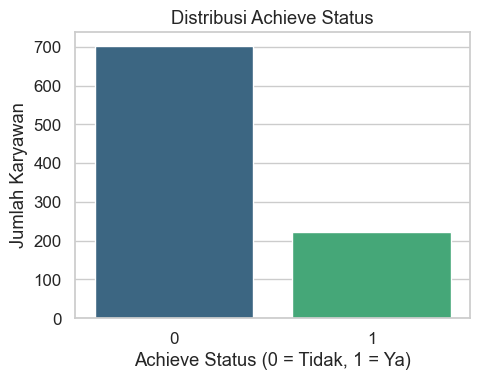

In [35]:
# Visualisasi Bar Chart

plt.figure(figsize=(5,4))
sns.countplot(x='achieve_status', data=df, palette='viridis')
plt.title('Distribusi Achieve Status')
plt.xlabel('Achieve Status (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Karyawan')
plt.tight_layout()
plt.show()

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\1650738936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='achieve_status', y='stress_index', data=df, palette='mako')


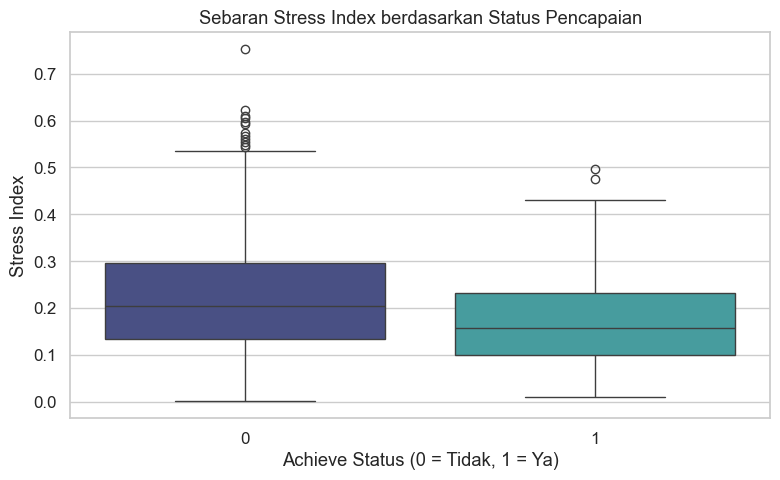

In [36]:
# Visualisasi boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x='achieve_status', y='stress_index', data=df, palette='mako')
plt.title('Sebaran Stress Index berdasarkan Status Pencapaian')
plt.xlabel('Achieve Status (0 = Tidak, 1 = Ya)')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

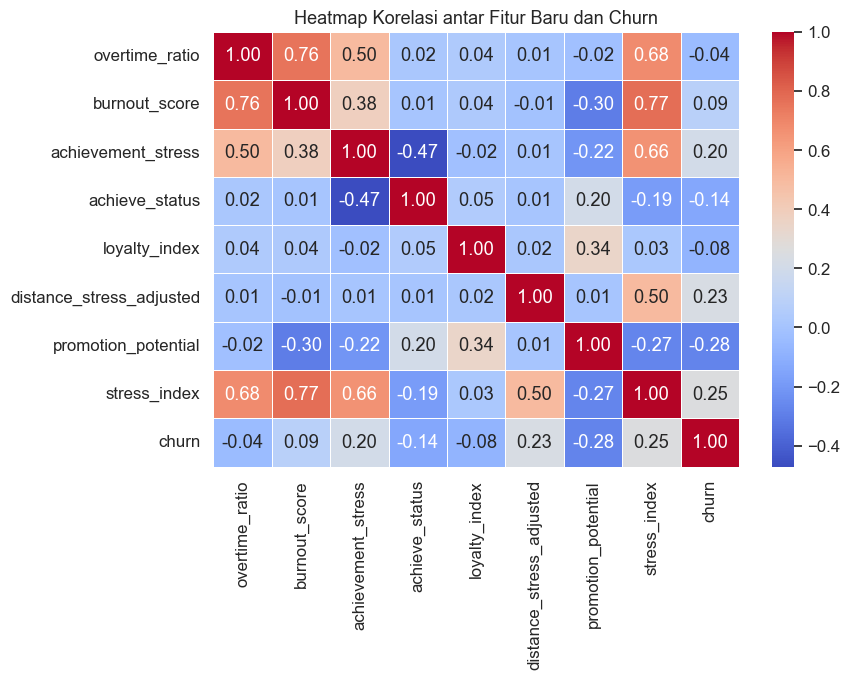

In [37]:
# Korelasi fitur baru dengan target

plt.figure(figsize=(9,7))
corr_matrix = df[feature_cols + ['churn']].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Heatmap Korelasi antar Fitur Baru dan Churn', fontsize=13)
plt.tight_layout()
plt.show()

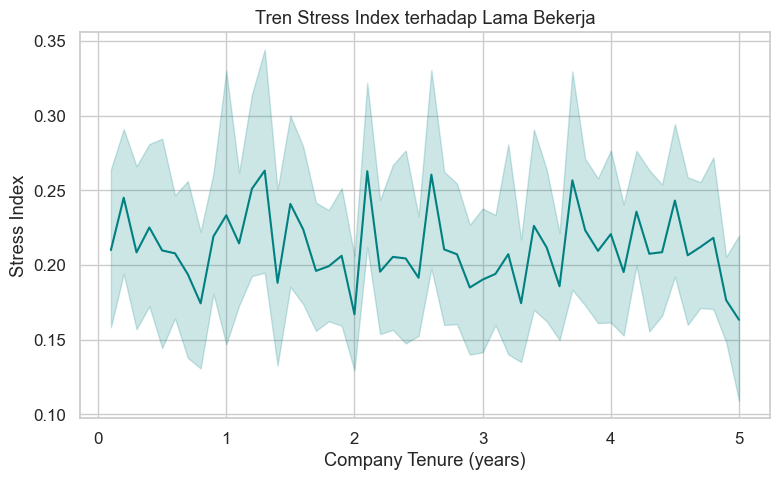

In [38]:
# Visualisasi Line chart (tren stress terhadap tenure)

plt.figure(figsize=(8,5))
sns.lineplot(
    x='company_tenure_years',
    y='stress_index',
    data=df.sort_values('company_tenure_years'),
    color='teal'
)
plt.title('Tren Stress Index terhadap Lama Bekerja')
plt.xlabel('Company Tenure (years)')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()


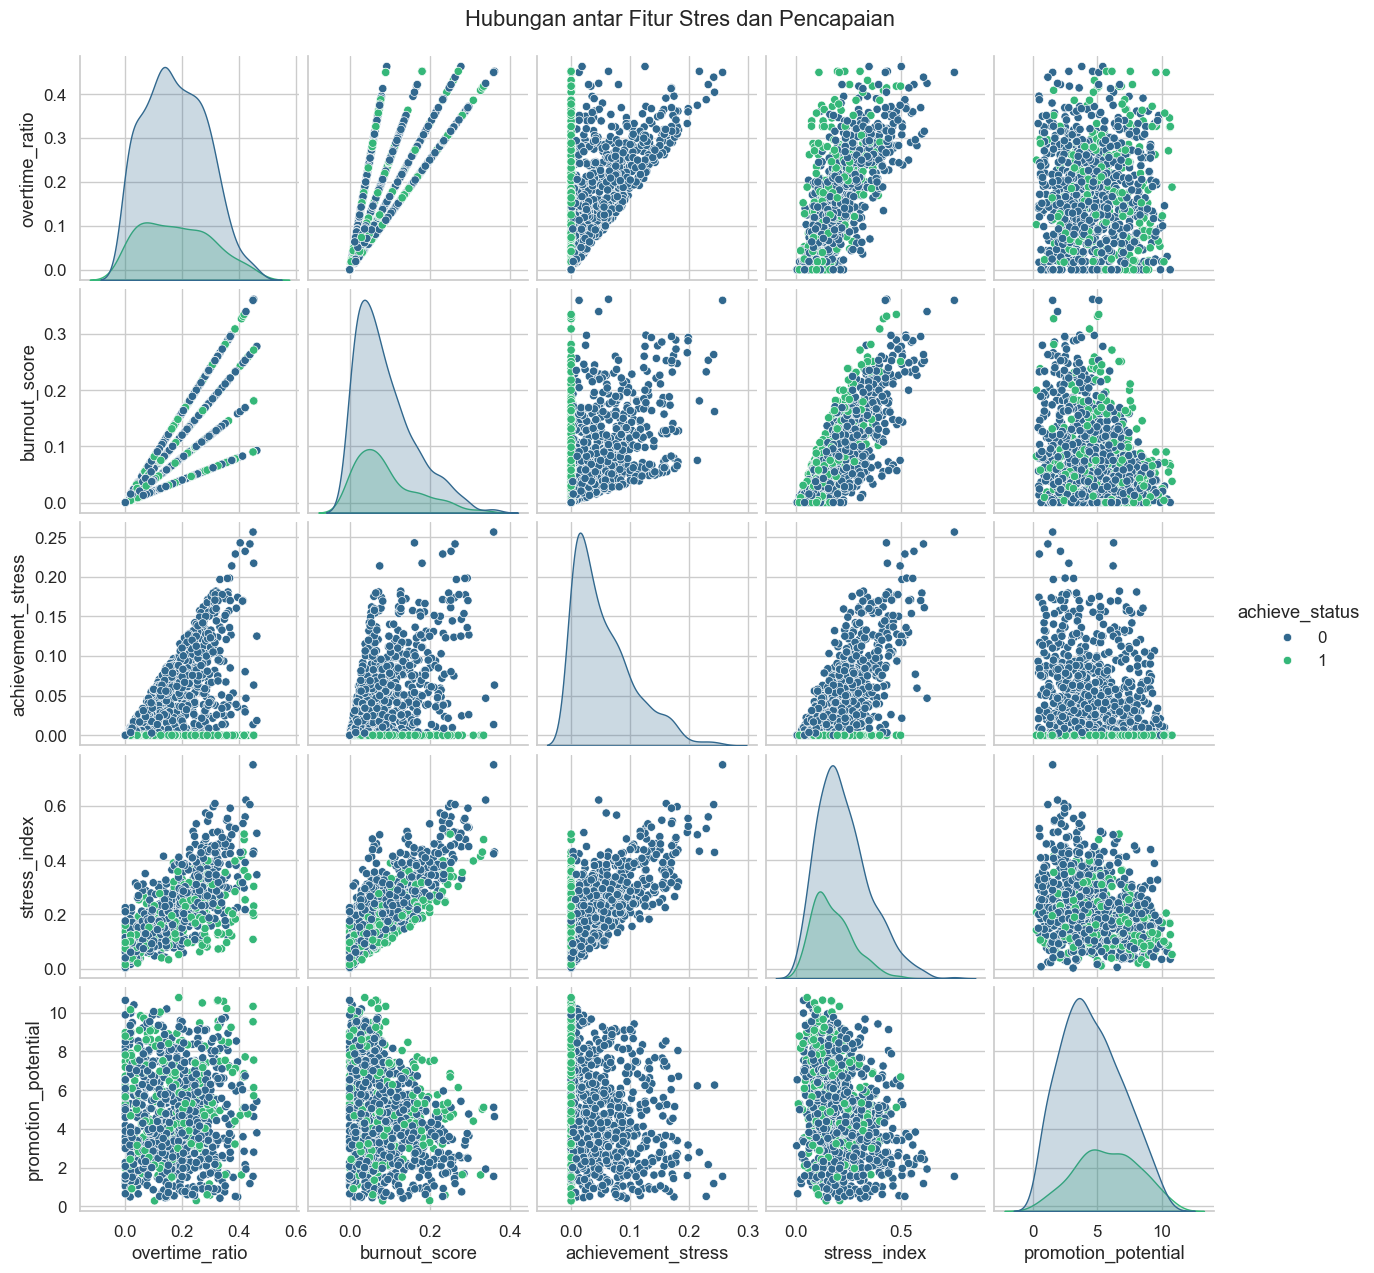

In [39]:
# Visualisasi Pairplot

sns.pairplot(
    df,
    vars=['overtime_ratio', 'burnout_score', 'achievement_stress', 'stress_index', 'promotion_potential'],
    hue='achieve_status',
    diag_kind='kde',
    palette='viridis'
)
plt.suptitle('Hubungan antar Fitur Stres dan Pencapaian', y=1.02)
plt.show()

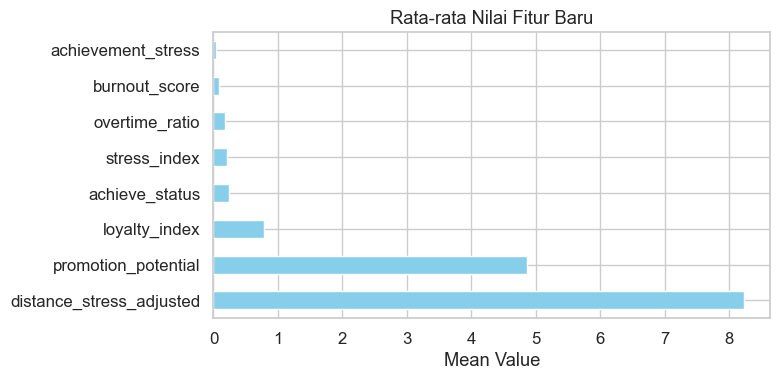

In [40]:
df[feature_cols].mean().sort_values(ascending=False).plot(
    kind='barh', color='skyblue', figsize=(8,4), title='Rata-rata Nilai Fitur Baru'
)
plt.xlabel('Mean Value')
plt.tight_layout()
plt.show()

Insight Tambahan :

Burnout tinggi saat overtime_ratio > 0.3
Achievement stress cenderung tinggi pada pegawai yang tidak mencapai target
Stress index meningkat seiring tenure (loyal tapi stres tinggi)
Korelasi kuat antara burnout_score dan stress_index

# Bivariate Analysis (New Fitur vs Target)

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


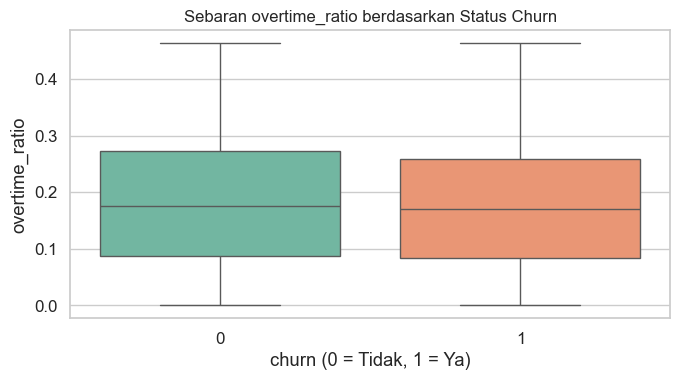

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


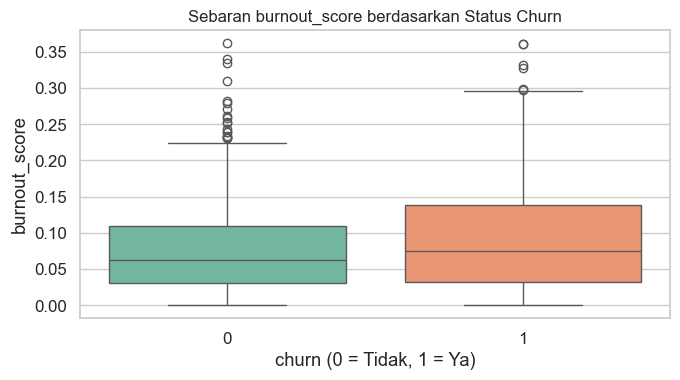

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


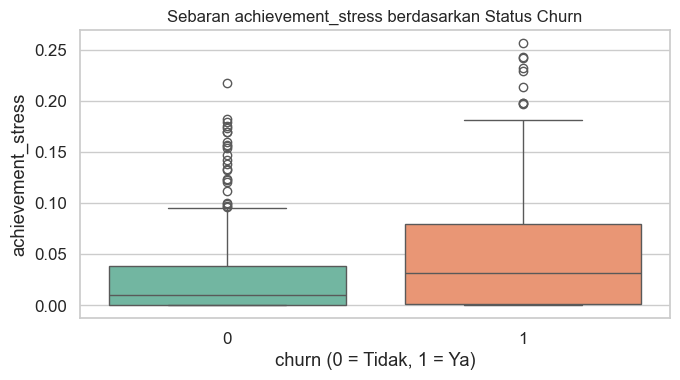

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


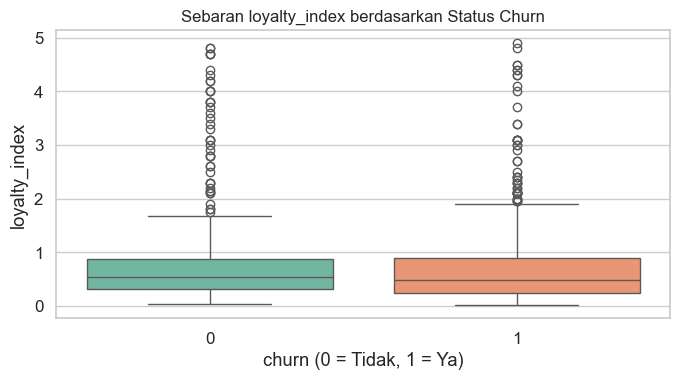

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


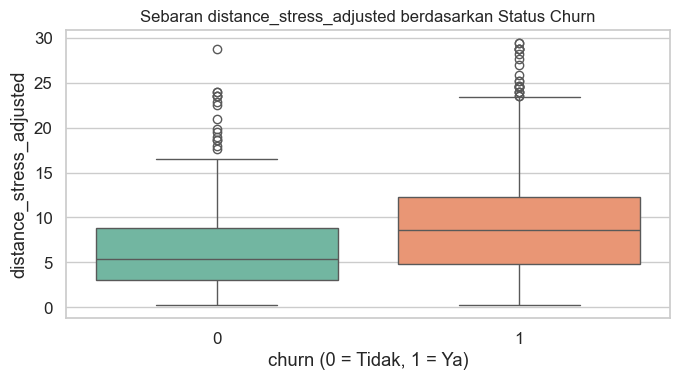

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


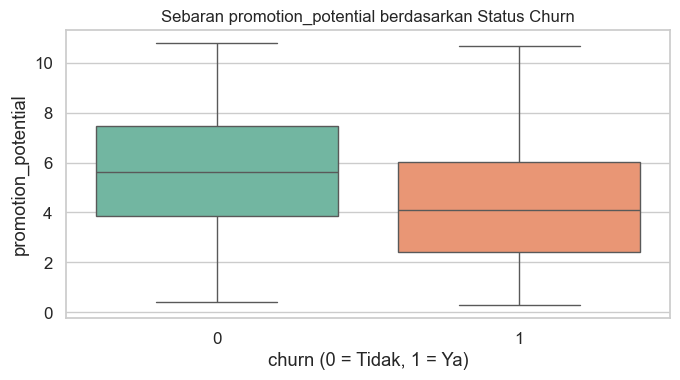

C:\Users\taufi\AppData\Local\Temp\ipykernel_3496\3648559865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


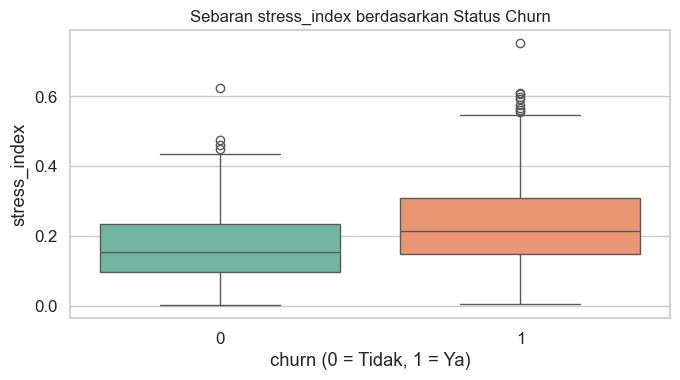

In [41]:
numeric_features = [col for col in feature_cols if df[col].nunique() > 2]

for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(
        x='churn',
        y=col,
        data=df,
        palette='Set2'
    )
    plt.title(f'Sebaran {col} berdasarkan Status Churn', fontsize=12)
    plt.xlabel('churn (0 = Tidak, 1 = Ya)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

<Figure size 1000x700 with 0 Axes>

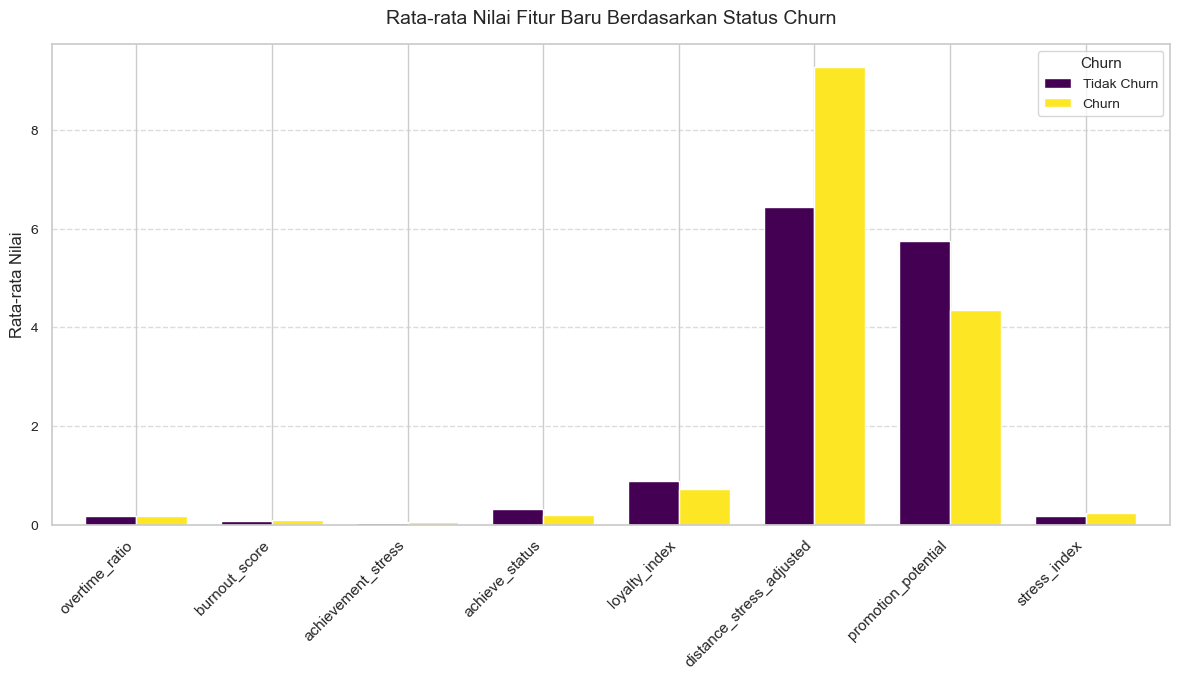

In [42]:
# Hitung rata-rata tiap fitur berdasarkan status churn
mean_features = df.groupby('churn')[feature_cols].mean().T

plt.figure(figsize=(10, 7))
mean_features.plot(
    kind='bar',
    figsize=(12, 7),        
    colormap='viridis',
    width=0.75
)

plt.title('Rata-rata Nilai Fitur Baru Berdasarkan Status Churn', fontsize=14, pad=15)
plt.ylabel('Rata-rata Nilai', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'], fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

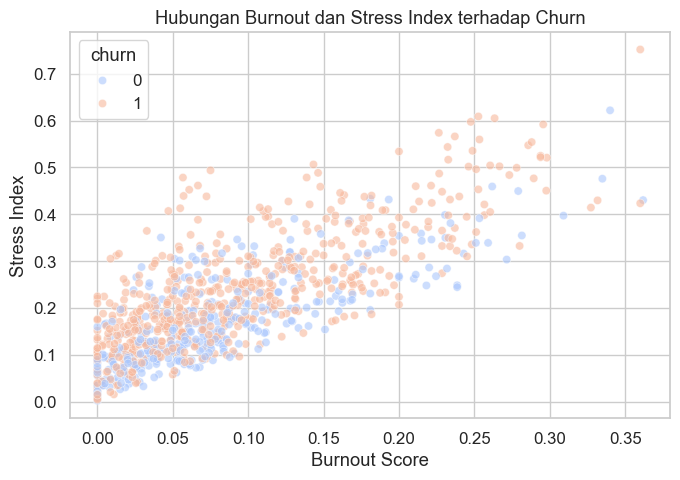

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='burnout_score',
    y='stress_index',
    hue='churn',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Hubungan Burnout dan Stress Index terhadap Churn')
plt.xlabel('Burnout Score')
plt.ylabel('Stress Index')
plt.tight_layout()
plt.show()

In [44]:
if 'distance_stress' in df.columns:
    df.drop(columns=['distance_stress'], inplace=True)
    print("🗑️ Dropped column: distance_stress")

🗑️ Dropped column: distance_stress


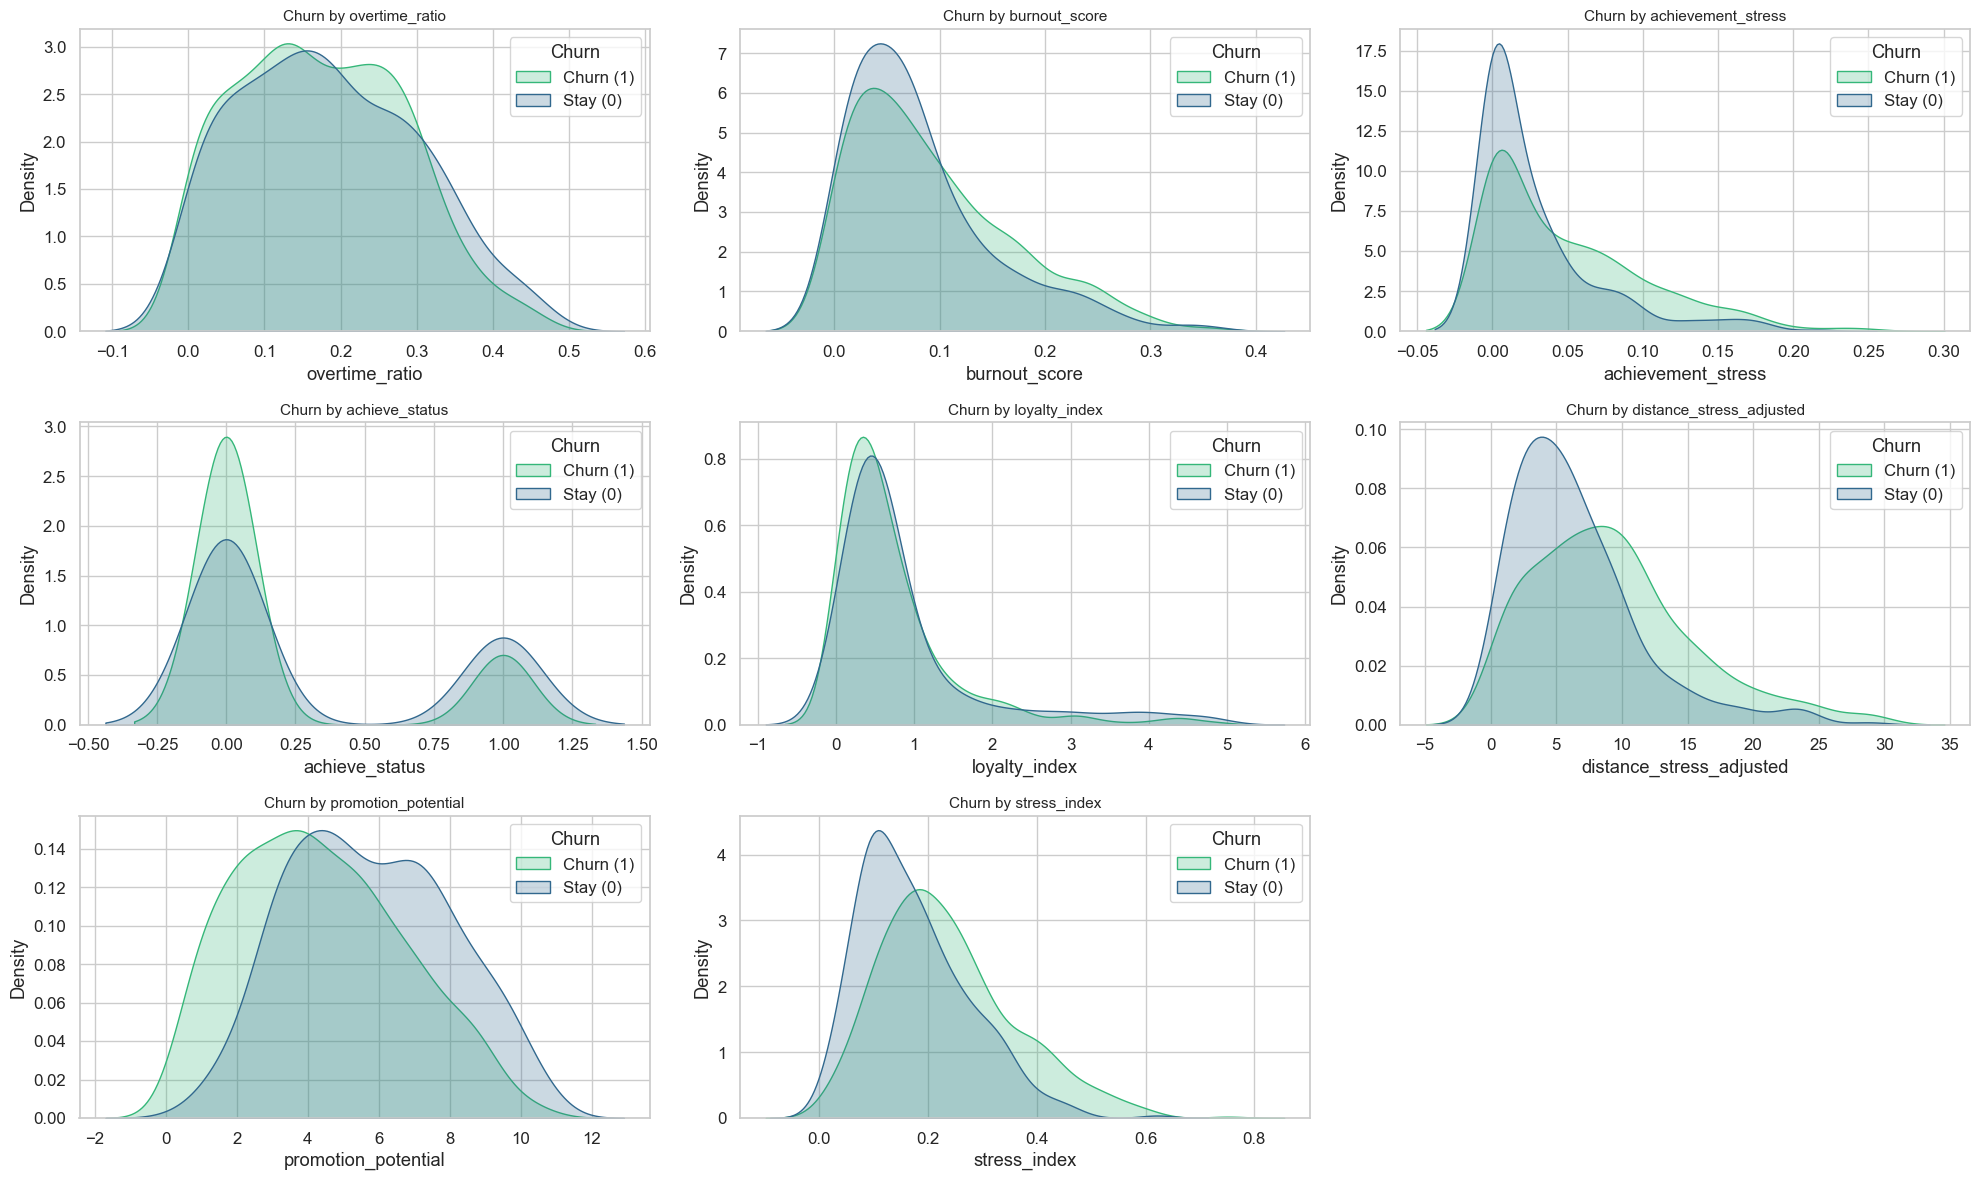

In [45]:
# Multivariate Feature Enggineering

plt.figure(figsize=(20, 12))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 3, i + 1)

    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Churn by {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Churn (1)', 'Stay (0)'])

plt.tight_layout()
plt.show()

It's show that employee churn is a toxic combination of external pressure (stress/commute) and internal dissatisfaction (burnout/loyalty), severely magnified by managerial failure and poor performance outcomes.

The hierarchy of churn drivers is:

* Workplace Experience & Wellbeing: Burnout Score, Loyalty Index, Stress Index, Job Satisfaction, and Manager Support Score are the most powerful predictors.

* Performance & Career Outlook: Target Achievement (failure to meet targets) and low Promotion Potential are key drivers.

* External Pressure: Distance-related stress and high Working Hours are significant contributing factors.

# Label Encoding

In [47]:
# Define categorical columns
categorical_cols = ['gender', 'education', 'work_location', 'marital_status']

# Make a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Number of columns before encoding:", df.shape[1])
print("Number of columns after encoding:", df_encoded.shape[1])

Number of columns before encoding: 27
Number of columns after encoding: 27


# Mutual Information Correlation

In [48]:
# KONVERSI FITUR KATEGORIKAL KE NUMERIK
X = df.drop(columns=[target_col])

# Drop churn_period dari X supaya tidak dianalisis
if 'churn_period' in X.columns:
    X = X.drop(columns=['churn_period'])

y = df[target_col]

# Deteksi kolom non-numerik setelah drop churn_period
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Buat salinan data untuk encoding
X_encoded = X.copy()
le = LabelEncoder()

for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

print(f"\n {len(categorical_cols)} kolom kategorikal berhasil di-encode:")
print(categorical_cols)

# CEK FITUR ENGINEERING SUDAH TERMASUK

engineered_features = [
    'overtime_ratio', 'burnout_score', 'achievement_stress', 'achieve_status',
    'loyalty_index', 'distance_stress_adjusted', 'promotion_potential', 'stress_index'
]

print("\n Mengecek fitur hasil feature engineering di X_encoded:")
for f in engineered_features:
    status = "✅" if f in X_encoded.columns else "❌"
    print(f" - {f}: {status}")

# HITUNG MUTUAL INFORMATION

mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'mutual_info': mi_scores
}).sort_values(by='mutual_info', ascending=False)

print("\n Top 10 Fitur Berdasarkan Mutual Information:")
display(mi_df.head(10))


 4 kolom kategorikal berhasil di-encode:
['gender', 'education', 'work_location', 'marital_status']

 Mengecek fitur hasil feature engineering di X_encoded:
 - overtime_ratio: ✅
 - burnout_score: ✅
 - achievement_stress: ✅
 - achieve_status: ✅
 - loyalty_index: ✅
 - distance_stress_adjusted: ✅
 - promotion_potential: ✅
 - stress_index: ✅

 Top 10 Fitur Berdasarkan Mutual Information:


feature  mutual_info
23       promotion_potential     0.060723
24              stress_index     0.054460
19        achievement_stress     0.054197
6         target_achievement     0.046313
22  distance_stress_adjusted     0.042747
14      company_tenure_years     0.030882
11          job_satisfaction     0.018883
9                     salary     0.017935
21             loyalty_index     0.016909
1                        age     0.014910

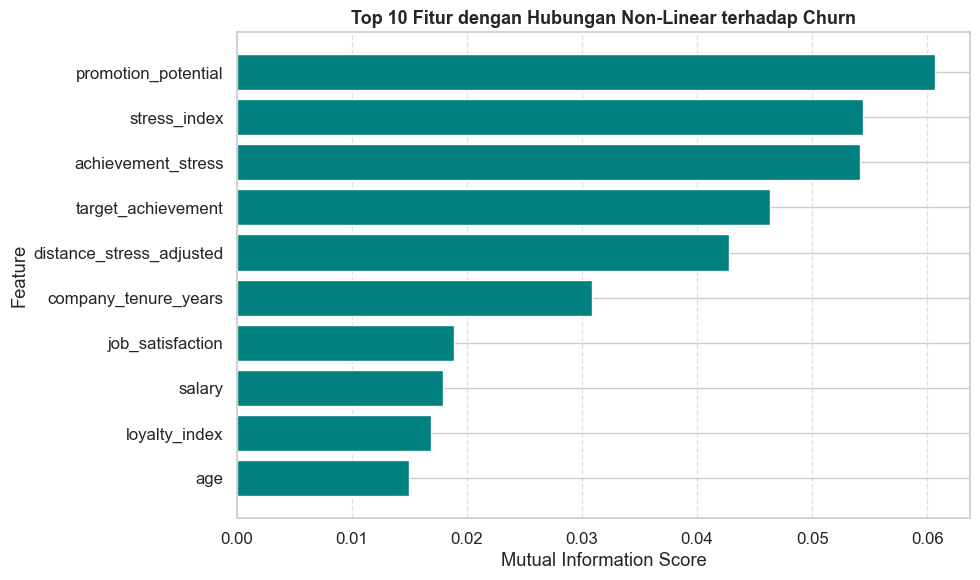

In [49]:
# VISUALISASI

plt.figure(figsize=(10, 6))
plt.barh(mi_df.head(10)['feature'][::-1], mi_df.head(10)['mutual_info'][::-1], color='teal')
plt.title('Top 10 Fitur dengan Hubungan Non-Linear terhadap Churn', fontsize=13, weight='bold')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Pearson & Spearman Correlation

In [50]:
# Semua kolom numerik termasuk hasil feature engineering
numeric_features = [col for col in df_encoded.select_dtypes(include=['number']).columns if col != 'employee_id']

# Pastikan target_col tidak dihitung
if target_col in numeric_features:
    numeric_features.remove(target_col)

from scipy import stats

corr_list = []
for col in numeric_features:
    try:
        # Handle potential non-numeric values that might have slipped through
        # or issues with the target column in case of encoding errors earlier.
        if pd.api.types.is_numeric_dtype(df_encoded[col]) and pd.api.types.is_numeric_dtype(df_encoded[target_col]):
             # Check for sufficient variance in both columns
            if df_encoded[col].nunique() > 1 and df_encoded[target_col].nunique() > 1:
                pearson_r, pearson_p = stats.pearsonr(df_encoded[col], df_encoded[target_col])
                spearman_r, spearman_p = stats.spearmanr(df_encoded[col], df_encoded[target_col])
                corr_list.append({
                    'feature': col,
                    'pearson_r': pearson_r,
                    'pearson_p': pearson_p,
                    'spearman_r': spearman_r,
                    'spearman_p': spearman_p
                })
            else:
                 print(f"⚠️ Kolom '{col}' atau target '{target_col}' tidak memiliki cukup variasi untuk korelasi.")
        else:
             print(f"⚠️ Kolom '{col}' atau target '{target_col}' bukan numerik setelah encoding.")

    except Exception as e:
        print(f"⚠️ Gagal menghitung korelasi untuk kolom {col}: {e}")

corr_df = pd.DataFrame(corr_list).sort_values(by='pearson_r', ascending=False)

print("\nTop 10 fitur numerik berdasarkan Pearson correlation:")
display(corr_df.head(10))


Top 10 fitur numerik berdasarkan Pearson correlation:


feature  pearson_r     pearson_p  spearman_r  \
23              stress_index   0.253269  5.095428e-15    0.257932   
21  distance_stress_adjusted   0.231611  9.628149e-13    0.246689   
18        achievement_stress   0.204785  3.174392e-10    0.208919   
15     distance_to_office_km   0.179762  3.634513e-08    0.179032   
6     working_hours_per_week   0.166235  3.634403e-07    0.166074   
17             burnout_score   0.085180  9.506788e-03    0.079428   
9            commission_rate   0.041220  2.101481e-01    0.041223   
11             work_location   0.023128  4.820932e-01    0.021727   
8                     salary   0.007542  8.187227e-01    0.007232   
0                        age   0.006665  8.394999e-01    0.008351   

      spearman_p  
23  1.540810e-15  
21  2.643963e-14  
18  1.364028e-10  
15  4.134470e-08  
6   3.731132e-07  
17  1.562419e-02  
9   2.101096e-01  
11  5.090279e-01  
8   8.260334e-01  
0   7.996683e-01

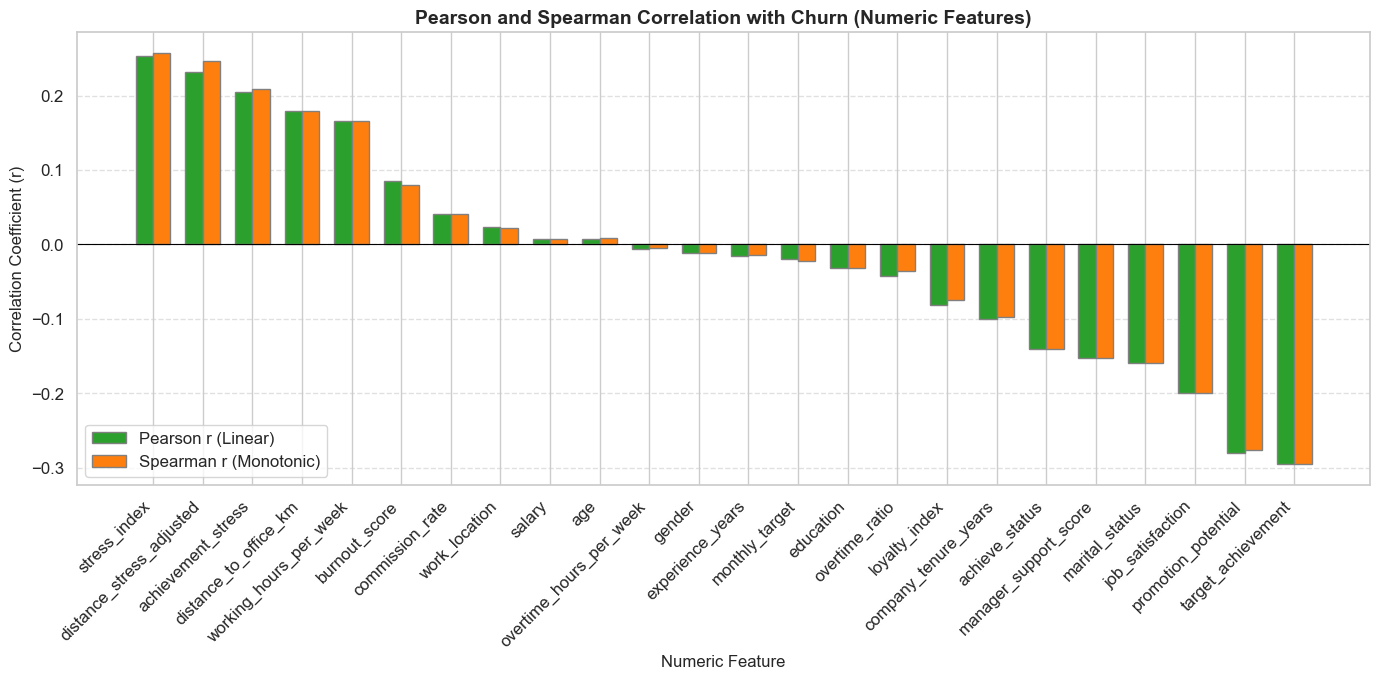

In [51]:
# Urutkan berdasarkan korelasi Pearson tertinggi
corr_df_sorted = corr_df.sort_values(by='pearson_r', ascending=False)
order = corr_df_sorted['feature'].tolist()

# Plot Bar Pearson & Spearman
plt.figure(figsize=(14, 7))
bar_width = 0.35
r = np.arange(len(order))

pearson_data = corr_df_sorted['pearson_r']
spearman_data = corr_df_sorted['spearman_r']

plt.bar(r - bar_width/2, pearson_data, color='#2ca02c', width=bar_width, edgecolor='grey', label='Pearson r (Linear)')
plt.bar(r + bar_width/2, spearman_data, color='#ff7f0e', width=bar_width, edgecolor='grey', label='Spearman r (Monotonic)')

plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.xlabel('Numeric Feature', fontsize=12)
plt.ylabel('Correlation Coefficient (r)', fontsize=12)
plt.title('Pearson and Spearman Correlation with Churn (Numeric Features)', fontsize=14, fontweight='bold')
plt.xticks(r, order, rotation=45, ha='right')
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Top 3 Prediktor Terkuat:**
  1. Stress Index (stress_index): Ini menunjukkan bahwa stres total yang dirasakan karyawan-gabungan antara burnout, tekanan pencapaian target, dan commute strain—adalah faktor paling signifikan untuk churn. Karyawan dengan stres lebih tinggi cenderung meninggalkan perusahaan.

  2. Distance Stress Adjusted (distance_stress_adjusted): Stres akibat perjalanan ke kantor yang sudah disesuaikan dengan status pernikahan memegang peranan penting; karyawan yang harus menempuh jarak jauh, apalagi dengan tanggung jawab keluarga, lebih rentan churn.

  3. Achievement Stress (achievement_stress): Karyawan yang bekerja keras tapi gagal mencapai target mengalami frustrasi yang signifikan, mendorong keputusan untuk meninggalkan perusahaan.

**Prediktor Sekunder:**

  1. Distance to Office (km) (distance_to_office_km): Jarak fisik ke kantor tetap relevan, tetapi pengaruhnya lebih rendah dibandingkan stres yang diperhitungkan.

  2. Working Hours per Week (working_hours_per_week): Jumlah jam kerja mempengaruhi churn secara moderat; terlalu banyak jam kerja meningkatkan risiko.

  3. Burnout Score (burnout_score): Kombinasi overtime dan kepuasan kerja rendah berkontribusi terhadap churn, tetapi efeknya lebih kecil dibandingkan stress index.

Commission Rate & Salary : Pengaruh finansial hanya minor; ini menunjukkan faktor “soft” seperti stres dan jarak lebih dominan daripada uang semata.

  1. Work Location (work_location): Lokasi kerja memiliki dampak rendah tetapi tetap ada peran minor.

  2. Age (age): Usia hampir tidak mempengaruhi churn dalam dataset ini.

**Crucial Insight:**

  1. Fitur target achievement tidak muncul di top 10, tetapi stress yang terkait dengan pencapaian target (achievement_stress) sangat penting. Hal ini menegaskan bahwa bukan besar kecilnya target yang mempengaruhi churn, tapi frustrasi akibat ketidakmampuan memenuhi target.

  2. Faktor finansial dan demografis (salary, age, work location) memiliki pengaruh lebih kecil dibandingkan faktor psikologis dan lingkungan kerja seperti stres, jarak, dan burnout.

These correlation results largely confirm the findings from the Mutual Information Scores (previous analysis):

Target Achievement, Job Satisfaction, and Manager Support are the most important factors inhibiting churn (strong negative correlations).

Distance to the Office and Hours Worked per Week are the most important factors driving churn (strong positive correlations).

Overtime Hours have a very weak correlation, indicating that the number of overtime hours per person is less of a driver of churn than the total number of weekly hours worked.

The Pearson (Linear) and Spearman (Monotone) correlations are very similar for all features, indicating that the relationship is fairly linear and well represented by Pearson's r.


Hasil Chi-Square & Cramér’s V terhadap 'churn':


feature  chi2_stat   p_value  cramers_v
3  marital_status  22.896300  0.000002   0.153852
0          gender   0.077568  0.780621   0.000000
1       education   0.905077  0.636012   0.000000
2   work_location   0.581409  0.747737   0.000000

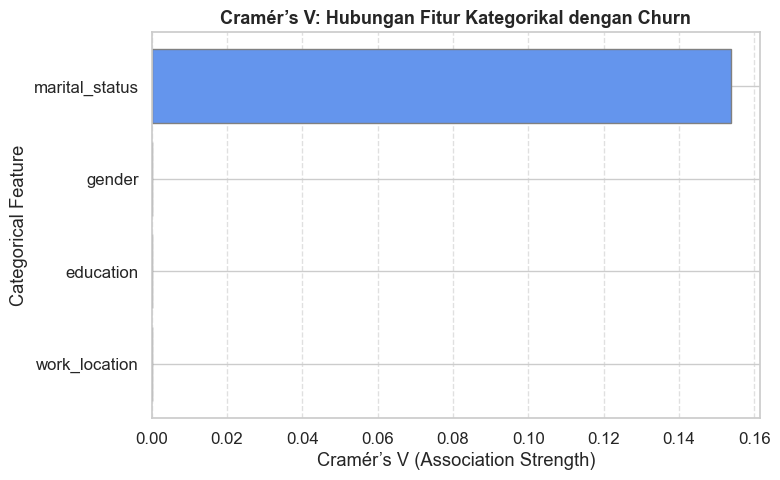

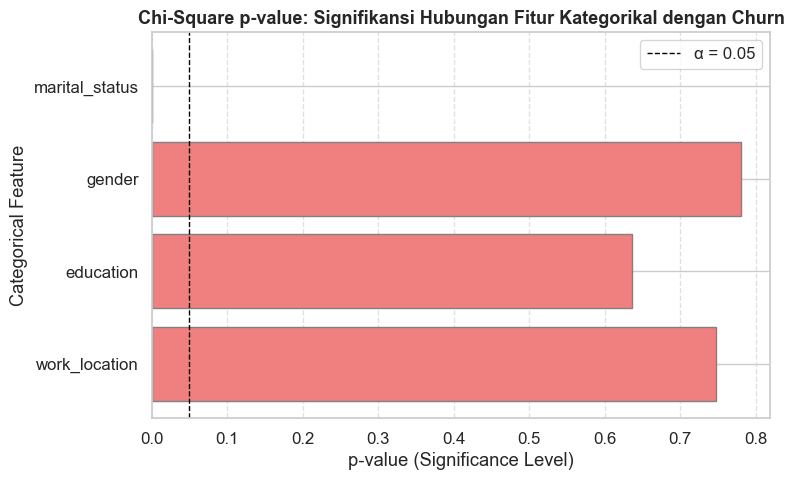

In [52]:
# Chi-Square Test & Cramér’s V untuk fitur kategorikal
# =====================================================
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """Menghitung Cramér’s V dari tabel kontingensi"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    # Added a small epsilon to the denominator to avoid division by zero
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1) + 1e-9))

# Target variabel untuk uji Chi-Square
target_var = 'churn'

# Fitur kategorikal dalam dataset (menggunakan df_encoded karena sudah di-label encoding)
categorical_features = ['gender', 'education', 'work_location', 'marital_status'] # Asumsi ini masih relevan

cramer_list = []

# Check if df_encoded and target_var exist and are valid
if 'df_encoded' not in locals() or not isinstance(df_encoded, pd.DataFrame):
     print("⚠️ DataFrame 'df_encoded' belum terdefinisi. Harap jalankan sel sebelumnya.")
elif target_var not in df_encoded.columns:
    print(f"⚠️ Target variable '{target_var}' tidak ditemukan dalam dataset 'df_encoded'.")
elif len(categorical_features) == 0:
    print("\n⚠️ Tidak ada fitur kategorikal yang terdeteksi untuk uji Chi-square.")
else:
    for col in categorical_features:
        # Pastikan kolom kategorikal ada di df_encoded
        if col not in df_encoded.columns:
             print(f"⚠️ Kolom kategorikal '{col}' tidak ditemukan dalam 'df_encoded'. Melewati uji.")
             continue

        try:
            confusion_mat = pd.crosstab(df_encoded[col], df_encoded[target_var])

            # Lewati kolom jika variasinya terlalu sedikit
            if confusion_mat.shape[0] < 2 or confusion_mat.shape[1] < 2:
                print(f"⚠️ Kolom '{col}' dilewati (tidak memiliki cukup variasi atau target tidak biner).")
                continue

            # Cek apakah ada total 0 di tabel kontingensi yang bisa sebabkan error
            if confusion_mat.sum().sum() == 0:
                 print(f"⚠️ Kolom '{col}' dilewati (tabel kontingensi kosong).")
                 continue


            chi2_stat, chi2_p, dof, ex = chi2_contingency(confusion_mat)
            cramer_v = cramers_v(confusion_mat.values)
            cramer_list.append({
                'feature': col,
                'chi2_stat': chi2_stat,
                'p_value': chi2_p,
                'cramers_v': cramer_v
            })
        except Exception as e:
            print(f"⚠️ Gagal menghitung Chi-square untuk kolom '{col}': {e}")

    # Menampilkan hasil
    if len(cramer_list) > 0:
        cramer_df = pd.DataFrame(cramer_list).sort_values(by='cramers_v', ascending=False)
        print("\nHasil Chi-Square & Cramér’s V terhadap 'churn':")
        display(cramer_df)

        # Visualisasi Cramér’s V
        plt.figure(figsize=(8, 5))
        plt.barh(cramer_df['feature'], cramer_df['cramers_v'], color='cornflowerblue', edgecolor='grey')
        plt.xlabel("Cramér’s V (Association Strength)")
        plt.ylabel("Categorical Feature")
        plt.title("Cramér’s V: Hubungan Fitur Kategorikal dengan Churn", fontsize=13, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

        # Visualisasi p-value
        plt.figure(figsize=(8, 5))
        plt.barh(cramer_df['feature'], cramer_df['p_value'], color='lightcoral', edgecolor='grey')
        plt.xlabel("p-value (Significance Level)")
        plt.ylabel("Categorical Feature")
        plt.title("Chi-Square p-value: Signifikansi Hubungan Fitur Kategorikal dengan Churn", fontsize=13, fontweight='bold')
        plt.axvline(0.05, color='black', linestyle='--', linewidth=1, label='α = 0.05')
        plt.gca().invert_yaxis()
        plt.legend()
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("\n⚠️ Tidak ada hasil valid dari uji Chi-square / Cramér’s V.")

# Heatmap Correlation

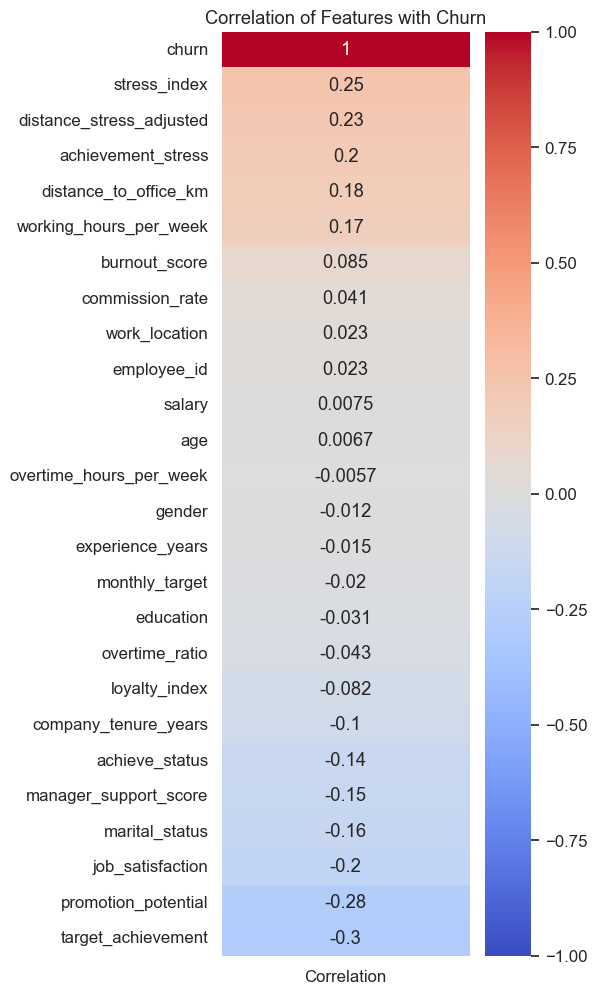

In [53]:
# Heatmap Correlation
if 'df_encoded' not in locals() or not isinstance(df_encoded, pd.DataFrame):
     print("⚠️ DataFrame 'df_encoded' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    encoded_exclude = ['churn_period_Stayed', 'churn_period_Onboarding', 'churn_period_3 Months']
    # Filter columns, ensuring they exist in df_encoded before attempting exclusion
    encoded_filtered = [f for f in df_encoded.columns if f not in encoded_exclude]

    # Calculate correlation matrix
    # Ensure numeric_only is True to avoid errors with non-numeric columns if any were missed
    corr_matrix = df_encoded[encoded_filtered].corr(numeric_only=True)

    # Check if 'churn' is in the correlation matrix columns before proceeding
    if 'churn' in corr_matrix.columns:
        churn_corr = corr_matrix['churn'].sort_values(ascending=False)

        # Visualisation
        plt.figure(figsize=(4,12))
        sns.heatmap(churn_corr.to_frame(name='Correlation'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation of Features with Churn')
        plt.show()
    else:
        print("⚠️ Kolom 'churn' tidak ditemukan setelah filtering kolom yang diexclude.")

Positive Correlation: Features with positive correlation mean that as their values increase, the probability of churn also increases. Key features include:

1. Stress Index (0.25) → Higher stress levels strongly increase churn.
2. Distance Stress Adjusted (0.23) → The combined effect of commute distance and stress contributes to churn.
3. Achievement Stress (0.20) → Performance pressure from achievement targets can lead to burnout and exit.
4. Distance to Office (0.18) → Employees living farther from the office are more likely to leave.
5. Working Hours per Week (0.17) → Longer working hours slightly raise churn probability.

Workload and stress-related factors are the main churn drivers. This highlights the importance of work-life balance and mental well-being support.

Negative Correlation: Features with negative correlation mean that as their values increase, the probability of churn decreases. Key features include:

1. Target Achievement (-0.30) → Employees who meet targets tend to stay longer.
2. Promotion Potential (-0.28) → Clear promotion opportunities reduce churn.
3. Job Satisfaction (-0.20) → Higher satisfaction strongly correlates with retention.
4. Marital Status - Single (-0.16) → Single employees show slightly better retention, possibly due to fewer external responsibilities.
5. Manager Support Score (-0.15) → Strong managerial support lowers churn risk.
6. Company Tenure (-0.10) → Longer-tenured employees are less likely to leave.

Factors tied to career growth, recognition, and job satisfaction are key to retaining employees.

# Standarization

In [56]:
from sklearn.preprocessing import StandardScaler

if 'df_encoded' not in locals() or not isinstance(df_encoded, pd.DataFrame):
     print("⚠️ DataFrame 'df_encoded' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'churn' in numeric_cols:
        numeric_cols.remove('churn')

    scaler = StandardScaler()

    df_scaled = df_encoded.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    display(df_scaled[numeric_cols].head())

employee_id       age  experience_years  monthly_target  \
0    -1.744882 -0.859643         -1.497004        0.627739   
1    -1.741414  1.131962          0.620988        1.425582   
2    -1.737946  0.365960          1.326986        0.764512   
3    -1.734478 -0.246841          0.973987        1.357196   
4    -1.731010 -0.706442          0.973987        0.376988   

   target_achievement  working_hours_per_week  overtime_hours_per_week  \
0            0.654081                0.904231                -0.075154   
1           -1.099223                0.097566                -0.250009   
2           -1.537549                0.558518                 0.099701   
3           -0.573232                1.595658                 0.973976   
4            0.960909               -1.054812                -0.075154   

     salary  commission_rate  job_satisfaction  manager_support_score  \
0 -0.579022        -1.239683          1.325757               0.418455   
1  0.243820         0.052080          0.433569               0.418455   
2 -0.499798         0.482667         -1.350807              -0.482683   
3 -1.302076        -0.378508         -1.350807              -0.482683   
4 -0.241105         0.913255          0.433569              -0.482683   

   company_tenure_years  distance_to_office_km  overtime_ratio  burnout_score  \
0              0.146960              -0.153886       -0.291162      -0.812293   
1              0.075674               0.847108       -0.288541      -0.416759   
2             -0.637185              -0.511384       -0.073694       0.633644   
3             -1.492615               0.561110        0.383016       1.188314   
4              1.358819              -0.725883        0.198995      -0.120706   

   achievement_stress  loyalty_index  distance_stress_adjusted  \
0           -0.660153       2.289123                 -0.275563   
1            0.512004      -0.455147                  0.130531   
2            1.076058      -0.678875                 -0.433488   
3            0.674958      -0.822539                  0.773512   
4           -0.835568      -0.254199                 -0.602693   

   promotion_potential  stress_index  
0             1.233647     -0.915514  
1             0.193412      0.020359  
2            -1.243929      0.626217  
3            -1.627683      1.401948  
4             1.526868     -0.722834

In [57]:
if 'df_scaled' not in locals() or not isinstance(df_scaled, pd.DataFrame):
     print("⚠️ DataFrame 'df_scaled' belum terdefinisi. Harap jalankan sel sebelumnya.")
else:
    # Safely drop columns, ignoring errors if they don't exist
    cols_to_drop = ['employee_id', 'churn_period']
    df_model = df_scaled.drop(columns=cols_to_drop, errors='ignore')

    # Optional: Display the first few rows of the prepared data for modeling
    # display(df_model.head())
    print("Data prepared for modeling (df_model).")
    print(f"Shape of df_model: {df_model.shape}")

Data prepared for modeling (df_model).
Shape of df_model: (926, 25)


# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

if 'df_model' not in locals() or not isinstance(df_model, pd.DataFrame):
     print("⚠️ DataFrame 'df_model' belum terdefinisi. Harap jalankan sel sebelumnya.")
elif 'churn' not in df_model.columns:
     print("⚠️ Kolom target 'churn' tidak ditemukan dalam df_model.")
else:
    X = df_model.drop(columns=['churn'])
    y = df_model['churn']

    # Ensure y has at least two unique values for stratification
    if y.nunique() < 2:
        print("⚠️ Kolom target 'churn' tidak memiliki cukup variasi untuk stratifikasi.")
        # You might want to skip train_test_split or handle it differently
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=42,
            stratify=y)

        print("Training set shape :", X_train.shape)
        print("Testing set shape  :", X_test.shape)

Training set shape : (740, 24)
Testing set shape  : (186, 24)


# Over Sampling

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check if X_train and y_train exist
if 'X_train' not in locals() or 'y_train' not in locals():
     print("⚠️ Data training (X_train, y_train) belum terdefinisi. Harap jalankan sel sebelumnya.")
elif y_train.nunique() < 2:
      print("⚠️ Kolom target y_train tidak memiliki cukup variasi untuk SMOTE.")
else:
    print("Distribusi sebelum SMOTE:")
    print(Counter(y_train))

    smote = SMOTE(random_state=42, sampling_strategy='auto')

    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Cek distribusi setelah SMOTE
    print("\nDistribusi setelah SMOTE:")
    print(Counter(y_train_resampled))

    # Tampilkan perbandingan jumlah data
    print(f"\nJumlah data sebelum SMOTE: {len(y_train)}")
    print(f"Jumlah data setelah SMOTE : {len(y_train_resampled)}")

Distribusi sebelum SMOTE:
Counter({1: 467, 0: 273})

Distribusi setelah SMOTE:
Counter({1: 467, 0: 467})

Jumlah data sebelum SMOTE: 740
Jumlah data setelah SMOTE : 934
